In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('fifa.csv')



                

C:\Users\vladm\AppData\Local\Temp\ipykernel_2568\604148689.py:5: DtypeWarning: Columns (24,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa.csv')


In [347]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age', 'dob', 'height_cm', 'weight_kg', 'club_position', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_loaned_from',
       'club_joined', 'club_jersey_number', 'club_contract_valid_until',
       'nationality_name', 'nation_team_id', 'nation_position',
       'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_spe

Firstly,I will delete obvious useless columns.
I will delete the column **club_loaned_from** because it has 300 not missing values from 19000 rows.
**club_joined,club_contract_valid_until,release_clause_eur** because I think it has very low correlation with player_position.


In [348]:
columnsToDrop = ['sofifa_id', 'player_url','long_name','dob','club_team_id','club_loaned_from','club_joined','club_jersey_number',
                 'club_contract_valid_until', 'nation_team_id','nation_jersey_number','release_clause_eur',
                 'player_face_url', 'club_logo_url', 'nation_logo_url','nation_flag_url']
df.drop(columnsToDrop, axis=1, inplace=True)

In [349]:
df.columns

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_position',
       'club_name', 'league_name', 'league_level', 'nationality_name',
       'nation_position', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'player_tags',
       'player_traits', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'me

1. Top 100 players with the highest rating

In [350]:
top100_rating = df[['short_name','overall','wage_eur']].sort_values(by=['overall'], ascending=False).head(100)
top100_rating.head(30)

short_name  overall  wage_eur
0            L. Messi       93  320000.0
1      R. Lewandowski       92  270000.0
2   Cristiano Ronaldo       91  270000.0
3           Neymar Jr       91  270000.0
4        K. De Bruyne       91  350000.0
5            J. Oblak       91  130000.0
6           K. Mbappé       91  230000.0
7            M. Neuer       90   86000.0
8       M. ter Stegen       90  250000.0
9             H. Kane       90  240000.0
10           N. Kanté       90  230000.0
16            S. Mané       89  270000.0
21      G. Donnarumma       89  110000.0
20            Alisson       89  190000.0
18            Ederson       89  200000.0
17           M. Salah       89  270000.0
19         J. Kimmich       89  160000.0
15        V. van Dijk       89  230000.0
11         K. Benzema       89  350000.0
13             H. Son       89  220000.0
12        T. Courtois       89  250000.0
14           Casemiro       89  310000.0
26           K. Navas       88  130000.0
29         E. Haaland       88  110000.0
28    Bruno Fernandes       88  250000.0
27        R. Sterling       88  290000.0
25          R. Lukaku       88  260000.0
24           T. Kroos       88  310000.0
23          L. Suárez       88  135000.0
22       Sergio Ramos       88  115000.0

2. Top 100 players with the highest salaries.

In [351]:
top100_salaries = df[['short_name','overall','wage_eur']].sort_values(by=['wage_eur'], ascending=False).head(100)
top100_salaries.head(30)

short_name  overall  wage_eur
4        K. De Bruyne       91  350000.0
11         K. Benzema       89  350000.0
0            L. Messi       93  320000.0
14           Casemiro       89  310000.0
24           T. Kroos       88  310000.0
27        R. Sterling       88  290000.0
2   Cristiano Ronaldo       91  270000.0
3           Neymar Jr       91  270000.0
1      R. Lewandowski       92  270000.0
17           M. Salah       89  270000.0
16            S. Mané       89  270000.0
30          S. Agüero       87  260000.0
25          R. Lukaku       88  260000.0
12        T. Courtois       89  250000.0
28    Bruno Fernandes       88  250000.0
8       M. ter Stegen       90  250000.0
9             H. Kane       90  240000.0
75          E. Hazard       85  240000.0
15        V. van Dijk       89  230000.0
10           N. Kanté       90  230000.0
6           K. Mbappé       91  230000.0
37           P. Pogba       87  220000.0
83       A. Griezmann       85  220000.0
13             H. Son       89  220000.0
58          R. Mahrez       86  220000.0
86           M. Depay       85  220000.0
43         F. de Jong       87  210000.0
87           Carvajal       85  210000.0
65     Bernardo Silva       86  200000.0
52    Sergio Busquets       86  200000.0

In [352]:
merged = pd.merge(top100_rating, top100_salaries,how='outer', on='short_name',indicator=True)
merged._merge.value_counts()

_merge
both          66
left_only     34
right_only    34
Name: count, dtype: int64

In general, top-rated football players receive top salaries, which is logical. However, there are also renowned football players who are not among the top 100 in ratings but still receive high salaries.

3.Top 30 goalkeepers with the highest rating.

In [353]:
goalkeepers = df[df.player_positions.str.contains("GK")] 
goalkeepers = goalkeepers.sort_values(by=['overall'], ascending=False)
top30_goalkeepers = goalkeepers[['short_name','overall','wage_eur','club_name']].head(30)
top30_goalkeepers

short_name  overall  wage_eur                 club_name
5             J. Oblak       91  130000.0        Atlético de Madrid
8        M. ter Stegen       90  250000.0              FC Barcelona
7             M. Neuer       90   86000.0         FC Bayern München
12         T. Courtois       89  250000.0            Real Madrid CF
18             Ederson       89  200000.0           Manchester City
20             Alisson       89  190000.0                 Liverpool
21       G. Donnarumma       89  110000.0       Paris Saint-Germain
26            K. Navas       88  130000.0       Paris Saint-Germain
31           H. Lloris       87  125000.0         Tottenham Hotspur
34         W. Szczęsny       87  105000.0                  Juventus
54         K. Casteels       86   88000.0             VfL Wolfsburg
48       S. Handanovič       86   78000.0                     Inter
70       K. Schmeichel       85  115000.0            Leicester City
73           Y. Sommer       85   40000.0  Borussia Mönchengladbach
77          P. Gulácsi       85   87000.0                RB Leipzig
106             De Gea       84  120000.0         Manchester United
113        E. Martínez       84   81000.0               Aston Villa
127         M. Maignan       84   45000.0                  AC Milan
167            N. Pope       83   45000.0                   Burnley
194           É. Mendy       83  105000.0                   Chelsea
169        J. Pickford       83   83000.0                   Everton
154            B. Leno       83   87000.0                   Arsenal
152        L. Hrádecký       83   55000.0       Bayer 04 Leverkusen
143      Sergio Asenjo       83   37000.0             Villarreal CF
222               Neto       82  115000.0              FC Barcelona
282       D. Livaković       82    1000.0             Dinamo Zagreb
267         Unai Simón       82   24000.0   Athletic Club de Bilbao
265  Raphaelinho Anjos       82   20000.0             RB Bragantino
243         P. Gollini       82   48000.0         Tottenham Hotspur
226           A. Lopes       82   60000.0        Olympique Lyonnais

Top 30 teams with the highest-rated players.

In average, per tournament ,teams uses 20 different players.I will only count the first 20 players in each team.

In [354]:
club_names = df.club_name.unique()
average_club_rating = {}
for club_name in club_names:
    club = df[df['club_name'] == club_name]
    club = club.sort_values(by=['overall'], ascending=False).head(20)
    average_club_rating[club_name] = club['overall'].mean()
top30_teams_by_rating = pd.DataFrame(list(average_club_rating.items()),columns = ['club_name','average_rating'])
top30_teams_by_rating = top30_teams_by_rating.sort_values(by=['average_rating'], ascending=False)
top30_teams_by_rating = top30_teams_by_rating.head(30).reset_index(drop=True)





In [355]:
top30_teams_by_rating

club_name  average_rating
0   Paris Saint-Germain           85.05
1       Manchester City           84.55
2        Real Madrid CF           83.55
3    Atlético de Madrid           83.40
4     Manchester United           83.35
5             Liverpool           83.00
6               Chelsea           82.90
7     FC Bayern München           82.50
8              Juventus           82.15
9          FC Barcelona           81.90
10                Inter           81.75
11           Sevilla FC           81.10
12    Tottenham Hotspur           81.00
13    Borussia Dortmund           80.50
14       Leicester City           79.95
15        Villarreal CF           79.90
16             AC Milan           79.85
17               Napoli           79.85
18             Atalanta           79.75
19           RB Leipzig           79.35
20                Lazio           79.10
21        Real Sociedad           79.00
22              Everton           78.95
23      West Ham United           78.80
24           SL Benfica           78.75
25              Arsenal           78.65
26  Real Betis Balompié           78.55
27                 Roma           78.45
28   Olympique Lyonnais           78.05
29        VfL Wolfsburg           77.95

Top 30 teams in which players have the fastest average speed

Pace column consists of movement_acelration and movement_sprint_speed.It will be our metric for speed.

In [356]:
club_names = df.club_name.unique()
average_club_speed = {}
for club_name in club_names:
    club = df[df['club_name'] == club_name]
    club = club.sort_values(by=['pace'], ascending=False).head(20)
    average_club_speed[club_name] = club['pace'].mean()
top30_teams_by_speed = pd.DataFrame(list(average_club_speed.items()),columns = ['club_name','average_speed'])
top30_teams_by_speed = top30_teams_by_speed.sort_values(by=['average_speed'], ascending=False)
top30_teams_by_speed = top30_teams_by_speed.head(30).reset_index(drop=True)
top30_teams_by_speed

club_name  average_speed
0              Real Madrid CF          80.40
1             Manchester City          80.10
2         Paris Saint-Germain          80.00
3           Manchester United          80.00
4             SK Slavia Praha          79.30
5                FC Barcelona          79.20
6   RCD Espanyol de Barcelona          79.10
7                    OGC Nice          79.00
8                     Arsenal          78.90
9        FC Red Bull Salzburg          78.80
10                        PSV          78.70
11          Borussia Dortmund          78.40
12                 SL Benfica          78.40
13     Jeonbuk Hyundai Motors          78.30
14           Shakhtar Donetsk          78.30
15              FCSB (Steaua)          78.15
16                       Ajax          78.00
17               Leeds United          77.95
18             Olympiacos CFP          77.90
19                     Napoli          77.85
20                   FC Porto          77.85
21                   AC Milan          77.80
22        Racing Club de Lens          77.65
23         Atlético de Madrid          77.65
24         New York Red Bulls          77.60
25                  Liverpool          77.60
26                   Juventus          77.50
27            VfL Bochum 1848          77.45
28            Vélez Sarsfield          77.40
29              VfL Wolfsburg          77.15

6. Top 10 of all Leagues in which the best dribblers

Also,we cant just take mean of dribbling column because it has low rating players who never was in international tournaments.I will take only 200 people from each league and drop the league with less than 200 players.

In [357]:
average_league_dribbling = {}

league_names = df.league_name.unique()
for league_name in league_names:
    league = df[df['league_name'] == league_name]
    if len(league) > 200:
        league = league.sort_values(by=['dribbling'], ascending=False).head(200)
        average_league_dribbling[league_name] = league['dribbling'].mean()
top30_leagues_by_dribbling = pd.DataFrame(list(average_league_dribbling.items()),columns = ['league_name','average_dribbling'])
top30_leagues_by_dribbling = top30_leagues_by_dribbling.sort_values(by=['average_dribbling'], ascending=False)
top30_leagues_by_dribbling = top30_leagues_by_dribbling.head(30).reset_index(drop=True)
top30_leagues_by_dribbling
    

league_name  average_dribbling
0          English Premier League             79.835
1          Spain Primera Division             78.815
2                 Italian Serie A             78.270
3            German 1. Bundesliga             77.025
4                  French Ligue 1             76.620
5      Portuguese Liga ZON SAGRES             73.580
6               Turkish Süper Lig             73.480
7      Argentina Primera División             73.240
8         USA Major League Soccer             72.580
9   Campeonato Brasileiro Série A             72.045
10             Holland Eredivisie             71.560
11    English League Championship             71.485
12                Mexican Liga MX             71.480
13     Belgian Jupiler Pro League             71.265
14       Spanish Segunda División             70.885
15           German 2. Bundesliga             69.590
16  Japanese J. League Division 1             68.545
17                 French Ligue 2             68.395
18   Saudi Abdul L. Jameel League             67.750
19             English League One             66.680
20    Polish T-Mobile Ekstraklasa             66.145
21           German 3. Bundesliga             66.130
22           Scottish Premiership             65.905
23             Swiss Super League             65.485
24          Norwegian Eliteserien             65.460
25   Austrian Football Bundesliga             65.355
26            Swedish Allsvenskan             65.225
27               Danish Superliga             65.140
28              Korean K League 1             64.935
29                Romanian Liga I             64.750

7. Top 30 teams with the highest rated players including 1 goalkeeper, 4 defenders, 4 midfielders, 2 forwards.

I checked, there are football players who can be, for example, defenders and linebackers at the same time, so count the specific number of exactly 4 defenders, etc. can not
For this task, I will create a new first_position column, which will contain the first player_positions for each player, and accordingly select players with the required positions

In [358]:
player_positions1 = df.player_positions.unique()
list_ = []
for player_position in player_positions1:
    if len(player_position)<=4:
        list_.append(player_position)
print(len(list_))
print(list_)


15
['ST', 'GK', 'CDM', 'CB', 'LW', 'RW', 'CM', 'CAM', 'LB', 'RB', 'CF', 'RWB', 'LM', 'RM', 'LWB']


In [359]:
df['player_positions'] = df['player_positions'].str.replace(r'\s', '', regex=True)
df['player_positions']= df['player_positions'].str.split(',', expand=False)
df.loc[:,'first_position'] = df['player_positions'].str[0]

In [360]:
club_with_best_of_eleven_players = {}
list_defenders = ['CB','LB','RB','LWB','RWB']
list_midfielders = ['CDM','CM','CAM','RM','LM','LW','RW']
list_attackers = ['CF','ST']
list_goalkeepers = ['GK']

for club_name in club_names:
    sum_ = 0
    club = df[df['club_name'] == club_name]
    four_defenders = club[club['first_position'].isin(list_defenders)==True].sort_values(by=['overall'], ascending=False).head(4)
    four_midfielders = club[club['first_position'].isin(list_midfielders)==True].sort_values(by=['overall'], ascending=False).head(4)
    two_attackers = club[club['first_position'].isin(list_attackers)==True].sort_values(by=['overall'], ascending=False).head(2)
    one_goalkeeper = club[club['first_position'].isin(list_goalkeepers)==True].sort_values(by=['overall'], ascending=False).head(1)

    sum_ = sum_ +four_midfielders['overall'].sum()
    sum_ = sum_ + two_attackers['overall'].sum()
    sum_ = sum_ + one_goalkeeper['overall'].sum()
    sum_ = sum_ + four_defenders['overall'].sum()
    sum_ = sum_/11 
    club_with_best_of_eleven_players[club_name] = sum_
club_with_best_of_eleven_players
df_club_with_best_of_eleven_players = pd.DataFrame.from_dict(club_with_best_of_eleven_players, orient='index', columns=['average_club_rating'])
df_club_with_best_of_eleven_players = df_club_with_best_of_eleven_players.reset_index()
df_club_with_best_of_eleven_players = df_club_with_best_of_eleven_players.rename(columns={'index':'club_name'})
df_club_with_best_of_eleven_players = df_club_with_best_of_eleven_players.sort_values(by=['average_club_rating'], ascending=False)
top30_clubs_by_best_of_eleven_players = df_club_with_best_of_eleven_players.head(30)


In [361]:
top30_clubs_by_best_of_eleven_players

club_name  average_club_rating
0        Paris Saint-Germain            87.636364
9                  Liverpool            86.000000
2          Manchester United            85.818182
8             Real Madrid CF            85.454545
4         Atlético de Madrid            85.272727
1          FC Bayern München            85.090909
5               FC Barcelona            84.818182
3            Manchester City            84.636364
7                    Chelsea            84.636364
11                  Juventus            84.090909
13                     Inter            83.545455
10         Borussia Dortmund            82.545455
18                Sevilla FC            82.545455
17            Leicester City            82.181818
23                  AC Milan            82.000000
16                    Napoli            81.818182
14             Villarreal CF            81.545455
21                RB Leipzig            81.454545
6          Tottenham Hotspur            81.454545
12                     Lazio            81.272727
28                  Atalanta            80.909091
19             Real Sociedad            80.909091
27                   Everton            80.818182
22                   Arsenal            80.727273
20  Borussia Mönchengladbach            80.545455
36   Athletic Club de Bilbao            80.272727
55                SL Benfica            80.181818
38                      Roma            80.090909
31       Real Betis Balompié            79.909091
15             VfL Wolfsburg            79.818182

8. Diagram of distribution of players by age by position.

9. Diagram of distribution of players by position rating.

10. Chart of distribution of nationalities by player rating.

For this diagram,I also will use first_position column because if I copy player with multiple different positions and it will be few times for example defender,It will be biesed.

In [362]:

# df_with_duplicates = pd.DataFrame(columns=df.columns)

#     #Iterate over each row in the dataframe
# for index, row in df.iterrows(): 
#     #Iterate over each position in the player_positions column
#     for player_pos in row['player_positions']:
#         dict_ ={}
#         #Iterate over each column in the dataframe
#         for column in df.columns:
#             if column != 'player_positions':
#                 #for player_positions column assign current position
#                 dict_[column] = row[column]
#             else:
#                 dict_['player_positions'] = player_pos
#         #Append the new dict to the dataframe with max length index
#         df_with_duplicates.loc[len(df_with_duplicates)] = dict_

# df_with_duplicates.to_csv('df_with_duplicates1.csv', index=False)


8. Diagram of distribution of players by age by position.

In [363]:
list_defenders = ['CB','LB','RB','LWB','RWB']
list_midfielders = ['CDM','CM','CAM','RM','LM','LW','RW']
list_attackers = ['CF','ST']
list_goalkeepers = ['GK']

In [364]:

df.loc[((df['first_position'].isin(list_defenders)) ==True),'type_of_player'] = 'defender'
df.loc[((df['first_position'].isin(list_attackers)) ==True),'type_of_player'] = 'atacker'
df.loc[((df['first_position'].isin(list_midfielders)) ==True),'type_of_player'] = 'midfielder'
df.loc[((df['first_position'].isin(list_goalkeepers)) ==True),'type_of_player'] = 'goalkeeper'


In [365]:
df

short_name player_positions  overall  potential    value_eur  \
0                L. Messi     [RW, ST, CF]       93         93   78000000.0   
1          R. Lewandowski             [ST]       92         92  119500000.0   
2       Cristiano Ronaldo         [ST, LW]       91         91   45000000.0   
3               Neymar Jr        [LW, CAM]       91         91  129000000.0   
4            K. De Bruyne        [CM, CAM]       91         91  125500000.0   
...                   ...              ...      ...        ...          ...   
19234           Song Defu            [CDM]       47         52      70000.0   
19235           C. Porter             [CM]       47         59     110000.0   
19236            N. Logue             [CM]       47         55     100000.0   
19237           L. Rudden             [ST]       47         60     110000.0   
19238  E. Lalchhanchhuaha            [CAM]       47         60     110000.0   

       wage_eur  age  height_cm  weight_kg club_position  ...  \
0      320000.0   34        170         72            RW  ...   
1      270000.0   32        185         81            ST  ...   
2      270000.0   36        187         83            ST  ...   
3      270000.0   29        175         68            LW  ...   
4      350000.0   30        181         70           RCM  ...   
...         ...  ...        ...        ...           ...  ...   
19234    1000.0   22        180         64           SUB  ...   
19235     500.0   19        175         70           RES  ...   
19236     500.0   21        178         72           RES  ...   
19237     500.0   19        173         66           RES  ...   
19238     500.0   19        167         61           SUB  ...   

      defending_standing_tackle defending_sliding_tackle  goalkeeping_diving  \
0                            35                       24                   6   
1                            42                       19                  15   
2                            32                       24                   7   
3                            32                       29                   9   
4                            65                       53                  15   
...                         ...                      ...                 ...   
19234                        43                       48                   6   
19235                        44                       47                  11   
19236                        44                       48                   8   
19237                        14                       11                   7   
19238                        31                       37                   8   

      goalkeeping_handling goalkeeping_kicking goalkeeping_positioning  \
0                       11                  15                      14   
1                        6                  12                       8   
2                       11                  15                      14   
3                        9                  15                      15   
4                       13                   5                      10   
...                    ...                 ...                     ...   
19234                   10                   5                      15   
19235                   12                   6                       8   
19236                    6                   7                      10   
19237                   10                   7                      14   
19238                   13                  13                       9   

       goalkeeping_reflexes  goalkeeping_speed  first_position type_of_player  
0                         8                NaN              RW     midfielder  
1                        10                NaN              ST        atacker  
2                        11                NaN              ST        atacker  
3                        11                NaN              LW     midfielder  
4                        13        

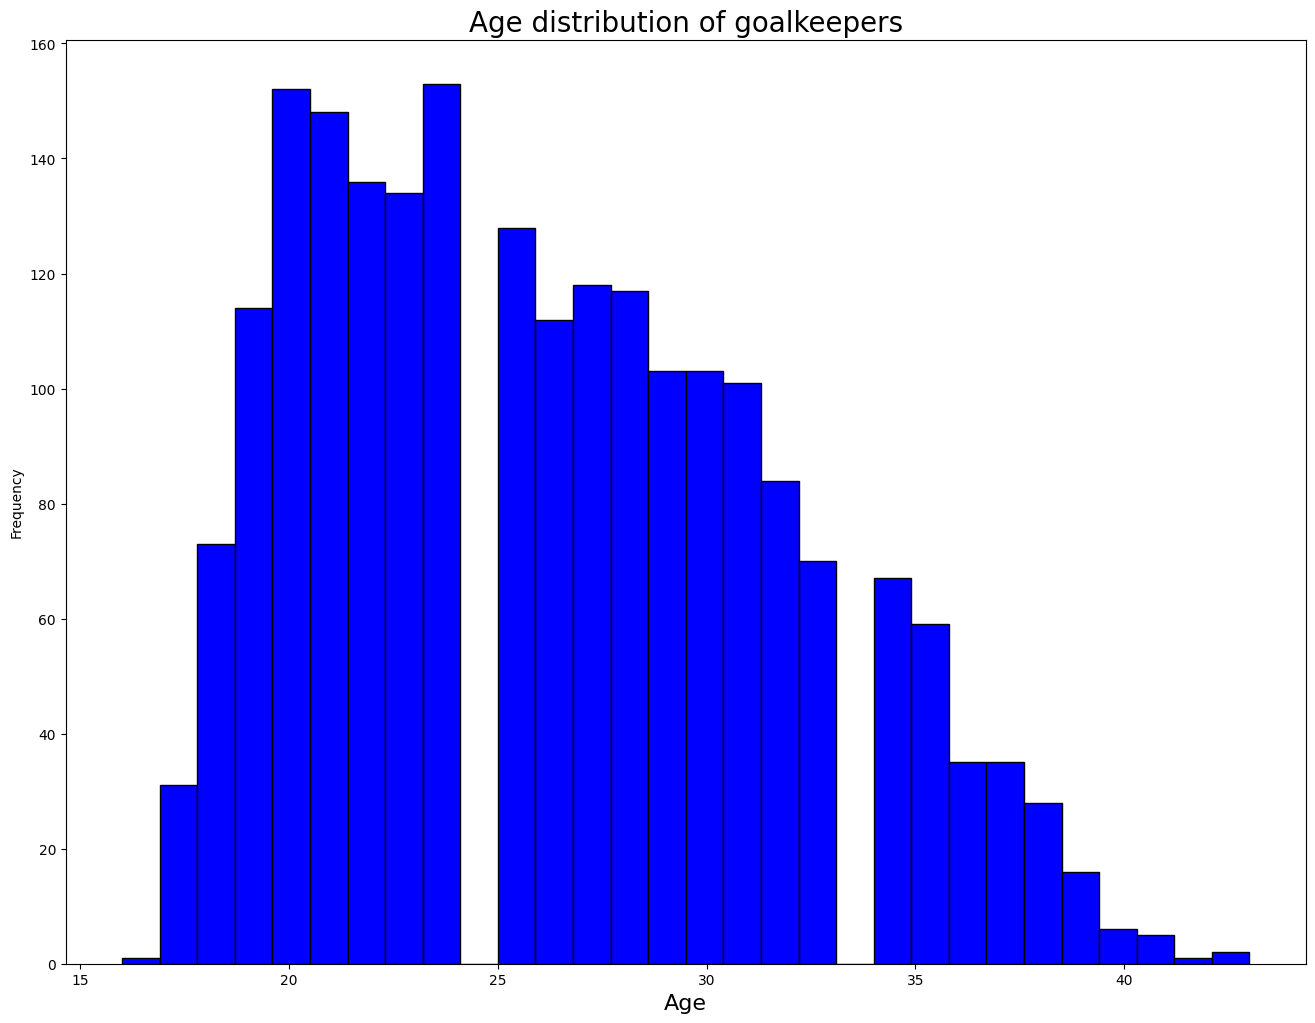

In [366]:
fig, ax = plt.subplots(figsize = (16,12))
df['age'][df['type_of_player'] == 'goalkeeper'].plot(kind = "hist", bins = 30, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Age distribution of goalkeepers", fontsize = 20)
ax.set_xlabel("Age", fontsize = 16)
plt.show()

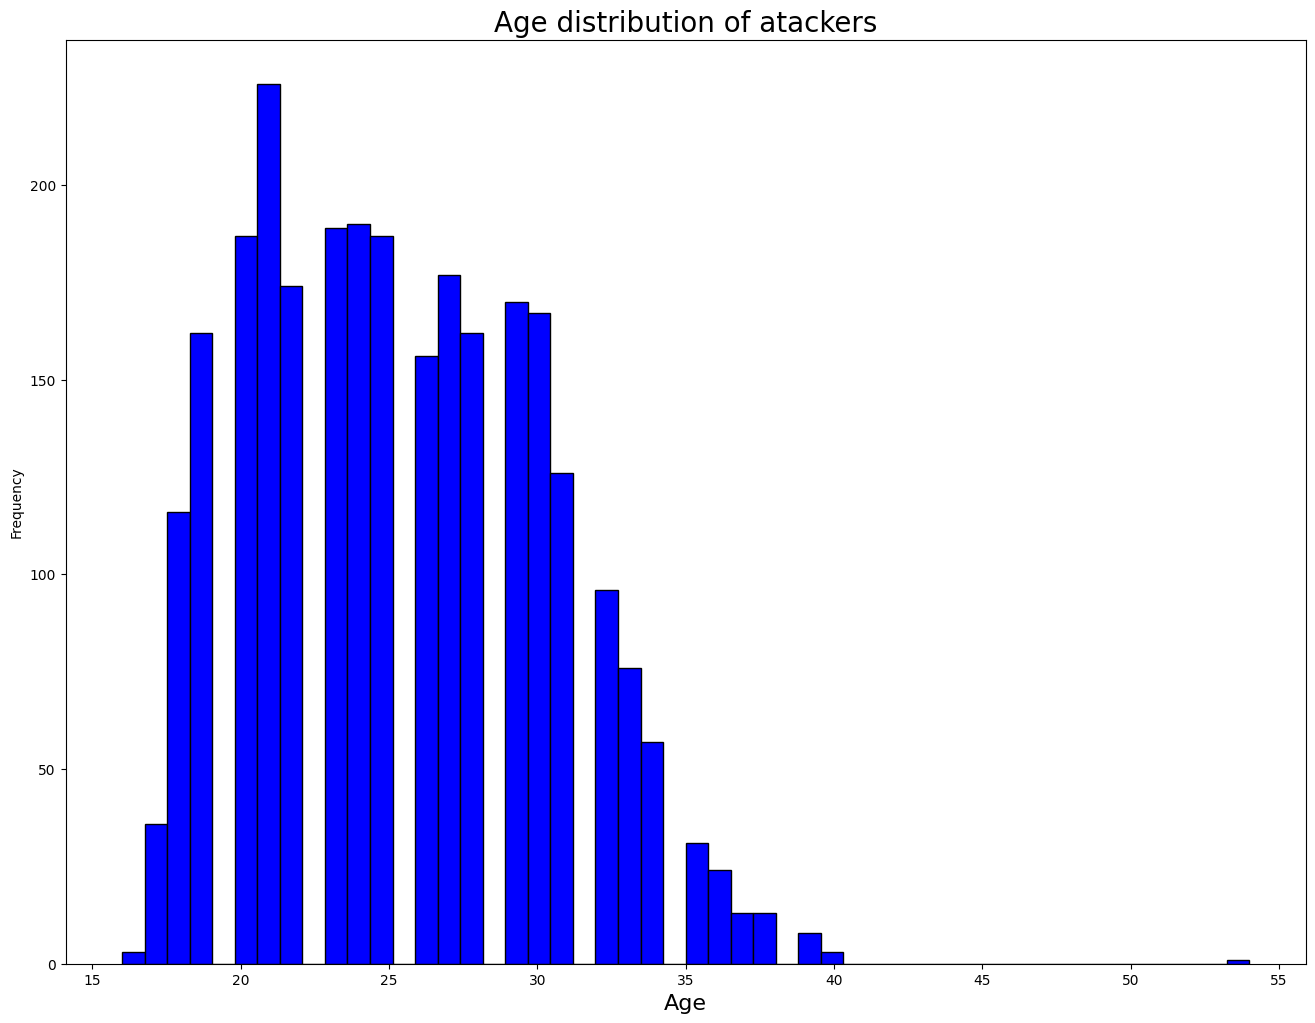

In [367]:

fig, ax = plt.subplots(figsize = (16,12))
df['age'][df['type_of_player'] == 'atacker'].plot(kind = "hist", bins = 50, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Age distribution of atackers", fontsize = 20)
ax.set_xlabel("Age", fontsize = 16)
plt.show()

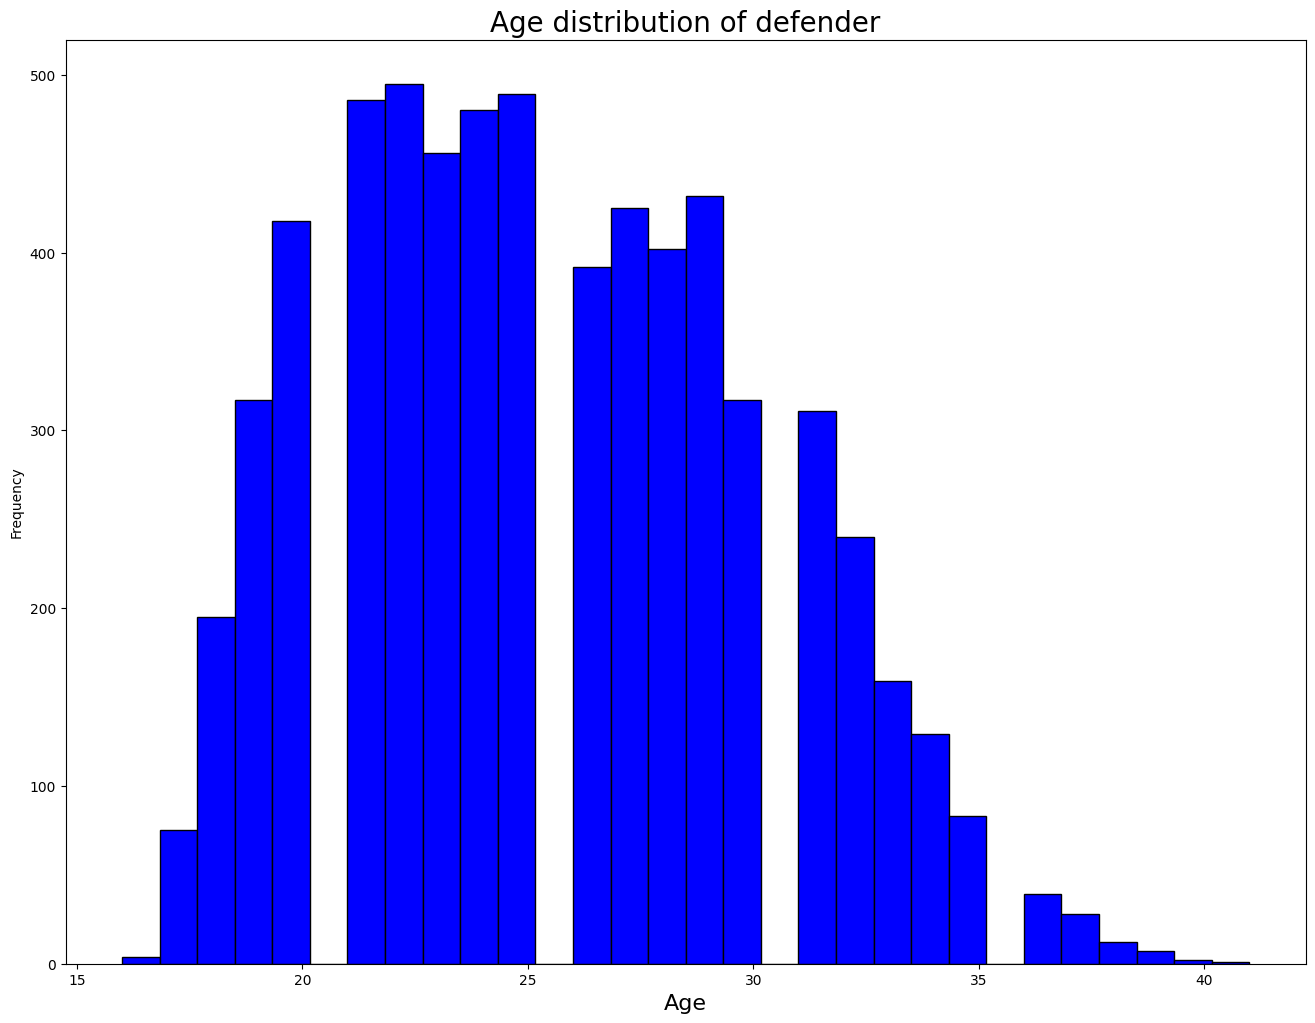

In [368]:

fig, ax = plt.subplots(figsize = (16,12))
df['age'][df['type_of_player'] == 'defender'].plot(kind = "hist", bins = 30, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Age distribution of defender", fontsize = 20)
ax.set_xlabel("Age", fontsize = 16)
plt.show()

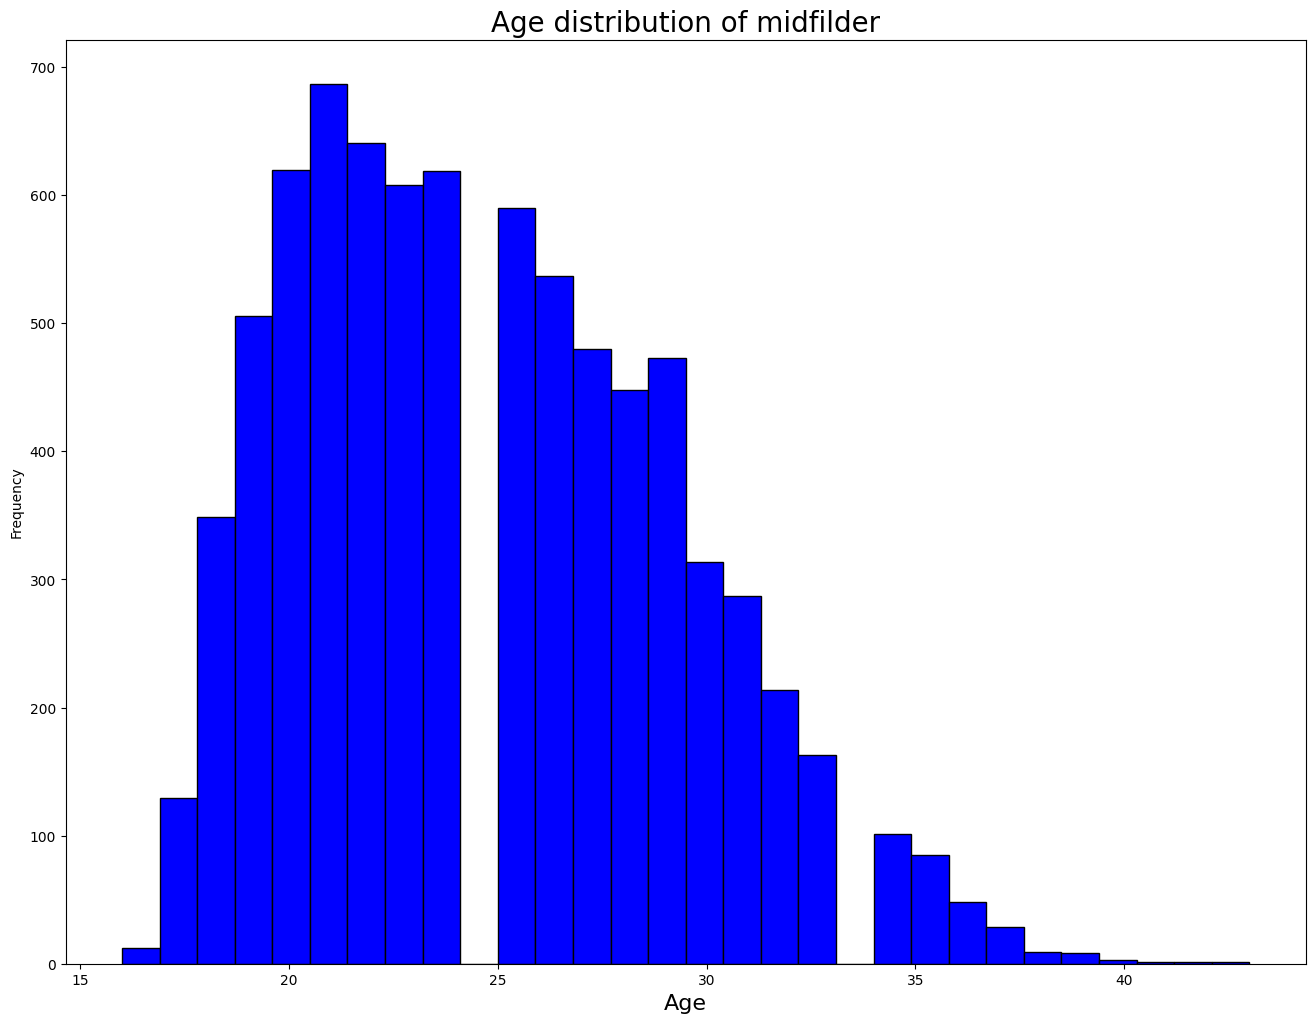

In [369]:

fig, ax = plt.subplots(figsize = (16,12))
df['age'][df['type_of_player'] == 'midfielder'].plot(kind = "hist", bins = 30, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Age distribution of midfilder", fontsize = 20)
ax.set_xlabel("Age", fontsize = 16)
plt.show()

We can conclude that teams recruit young players because they believe that they have greater potential and we can  see that we have some outliers

9. Diagram of distribution of players by position rating.

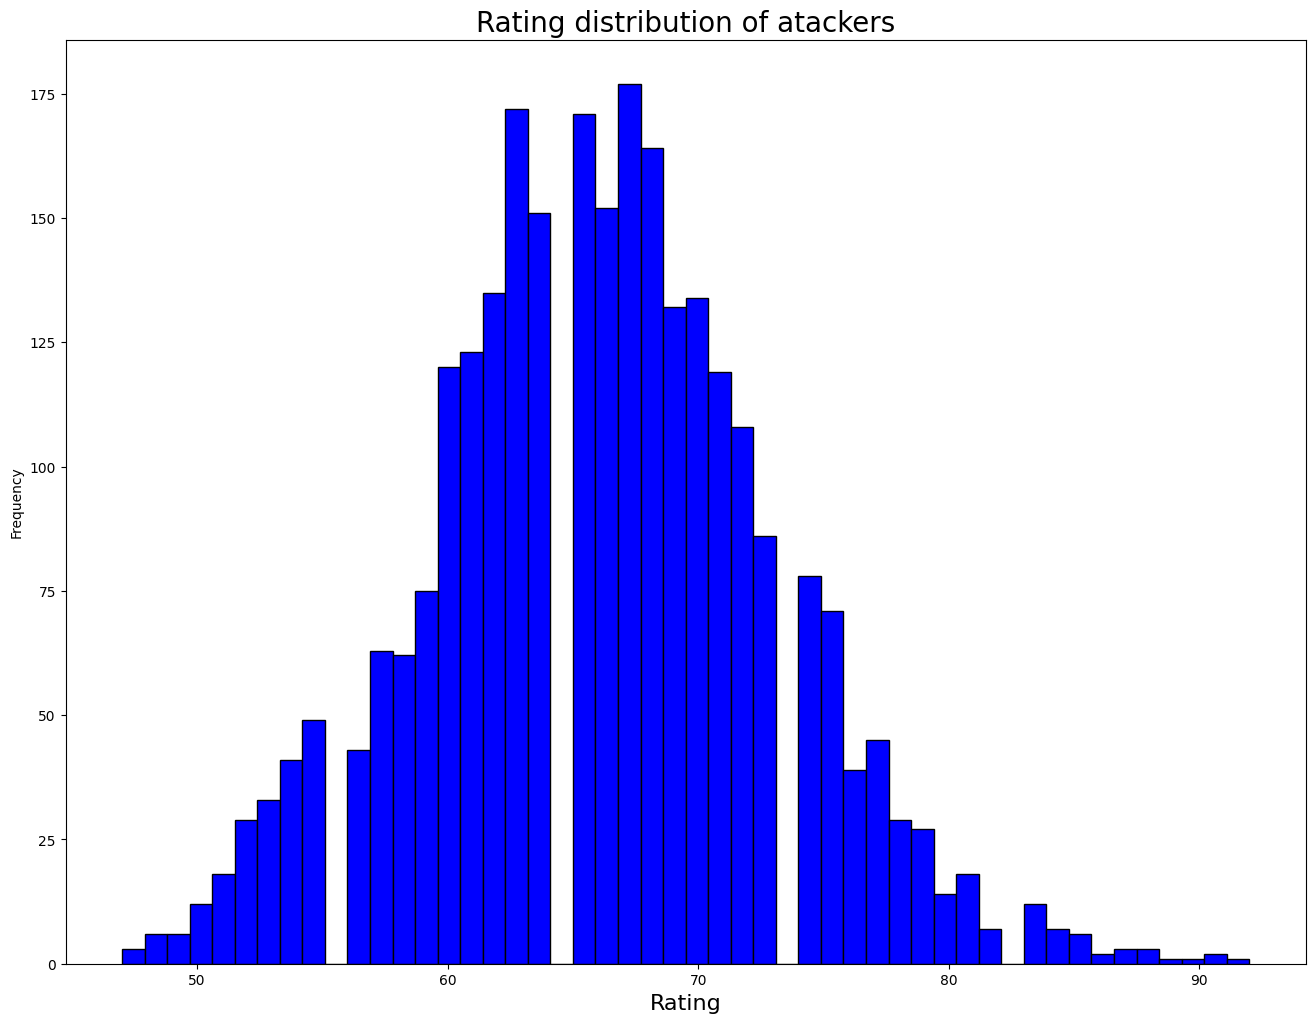

In [370]:

fig, ax = plt.subplots(figsize = (16,12))
df['overall'][df['type_of_player'] == 'atacker'].plot(kind = "hist", bins = 50, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Rating distribution of atackers", fontsize = 20)
ax.set_xlabel("Rating", fontsize = 16)
plt.show()

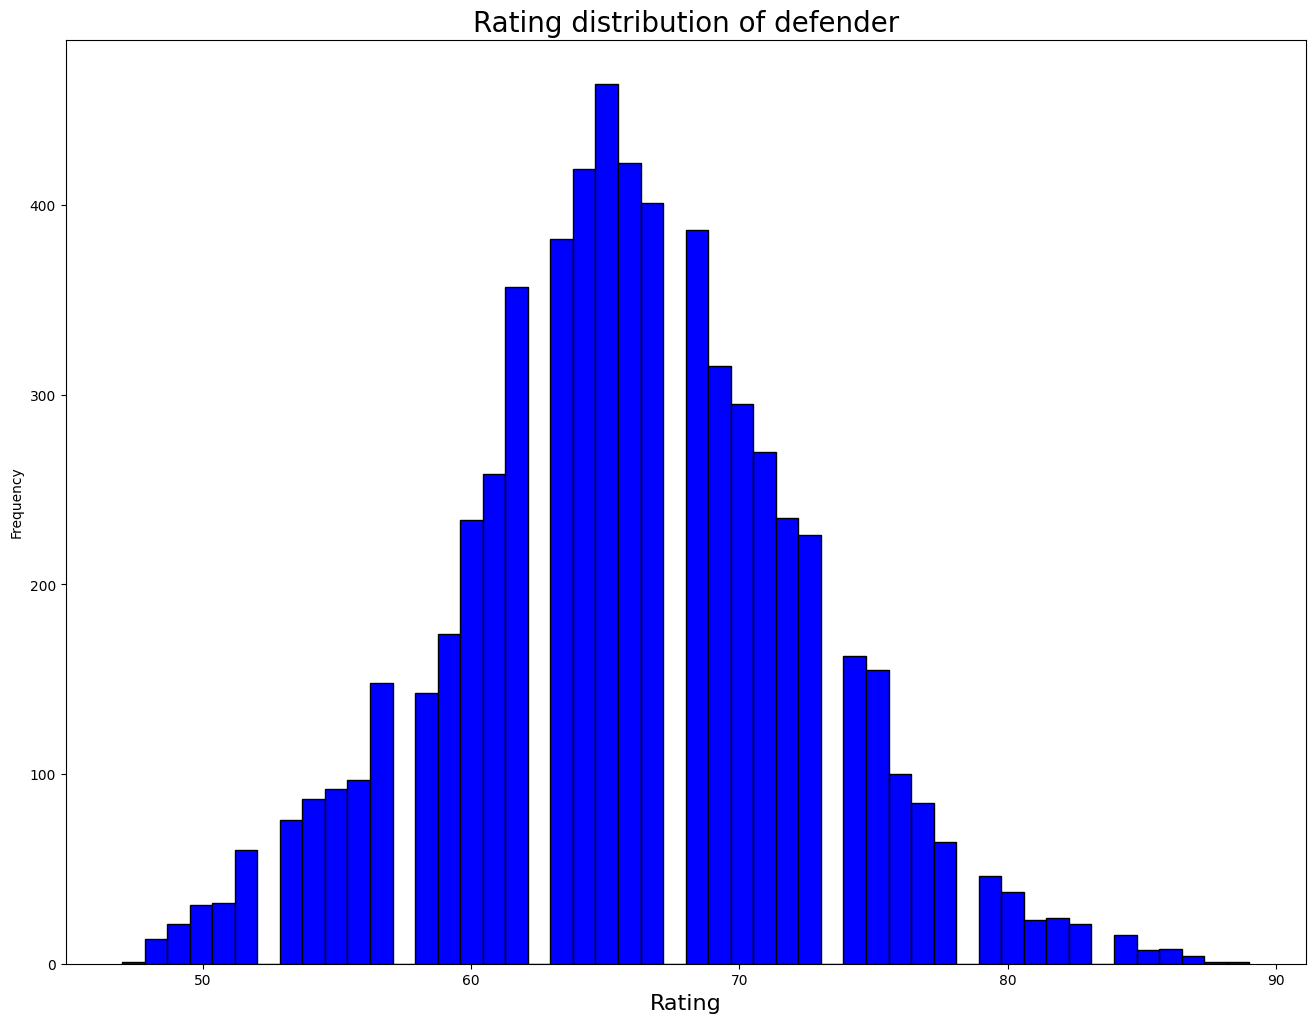

In [371]:

fig, ax = plt.subplots(figsize = (16,12))
df['overall'][df['type_of_player'] == 'defender'].plot(kind = "hist", bins = 50, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Rating distribution of defender", fontsize = 20)
ax.set_xlabel("Rating", fontsize = 16)
plt.show()

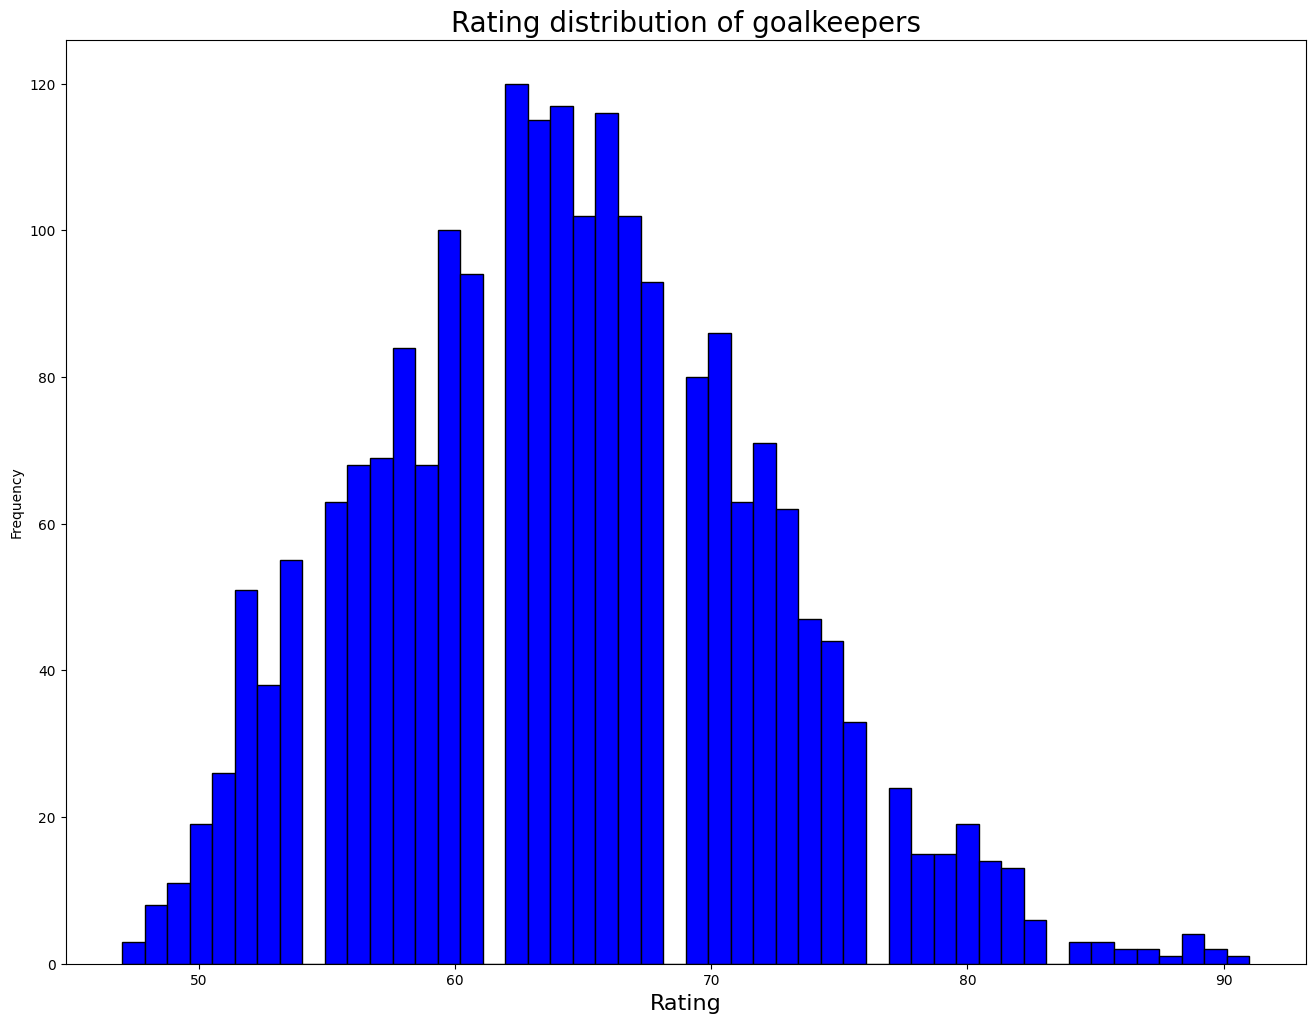

In [372]:

fig, ax = plt.subplots(figsize = (16,12))
df['overall'][df['type_of_player'] == 'goalkeeper'].plot(kind = "hist", bins = 50, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Rating distribution of goalkeepers", fontsize = 20)
ax.set_xlabel("Rating", fontsize = 16)
plt.show()

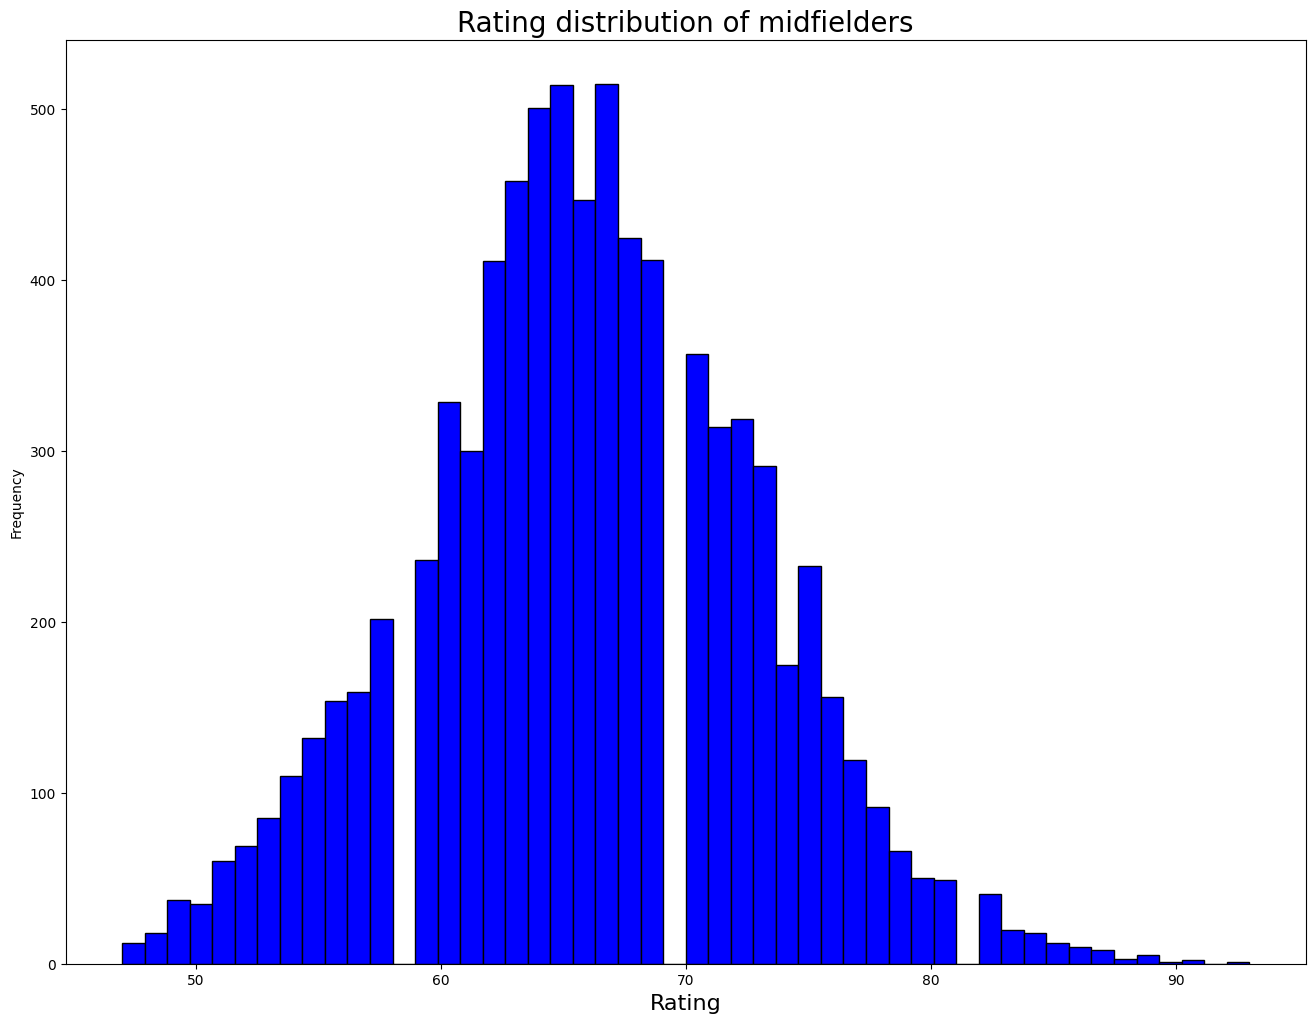

In [373]:

fig, ax = plt.subplots(figsize = (16,12))
df['overall'][df['type_of_player'] == 'midfielder'].plot(kind = "hist", bins = 50, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Rating distribution of midfielders", fontsize = 20)
ax.set_xlabel("Rating", fontsize = 16)
plt.show()

Our data is similar to normal, so most players have an average rating, etc.

Distribution diagram of player nationalities by player rating. 

I think it will be representative to take the countries that have more than 50 football players and take top 20 from them and select the first 10 nations
This will show how much the country is able to create national team for national tournaments.

In [374]:
average_nationality_rating = {}
nationalities = df.nationality_name.unique()
for nationality_name in nationalities:
    nationality = df[df['nationality_name'] == nationality_name]
    if len(nationality)>50: #checks if nationality have more 500 football players
        nationality.sort_values(by=['overall'], ascending=False)
        average_nationality_rating[nationality_name] = nationality['overall'].head(25).mean()

average_nat_rating = pd.DataFrame.from_dict(average_nationality_rating,orient='index',columns=['Average_Rating'])
average_nat_rating = average_nat_rating.sort_values(by=['Average_Rating'], ascending=False)
average_nat_rating = average_nat_rating.rename(columns={'index':'nationality'})
average_nat_rating = average_nat_rating.reset_index()
average_nat_rating=average_nat_rating.head(15)
average_nat_rating




    

index  Average_Rating
0         Spain           84.68
1       Germany           84.60
2        France           84.44
3        Brazil           84.24
4       England           83.92
5     Argentina           83.04
6         Italy           83.00
7      Portugal           83.00
8       Belgium           81.64
9   Netherlands           81.52
10      Uruguay           79.44
11      Croatia           78.76
12     Colombia           78.40
13       Mexico           77.92
14  Switzerland           77.76

<Axes: xlabel='index', ylabel='Average_Rating'>

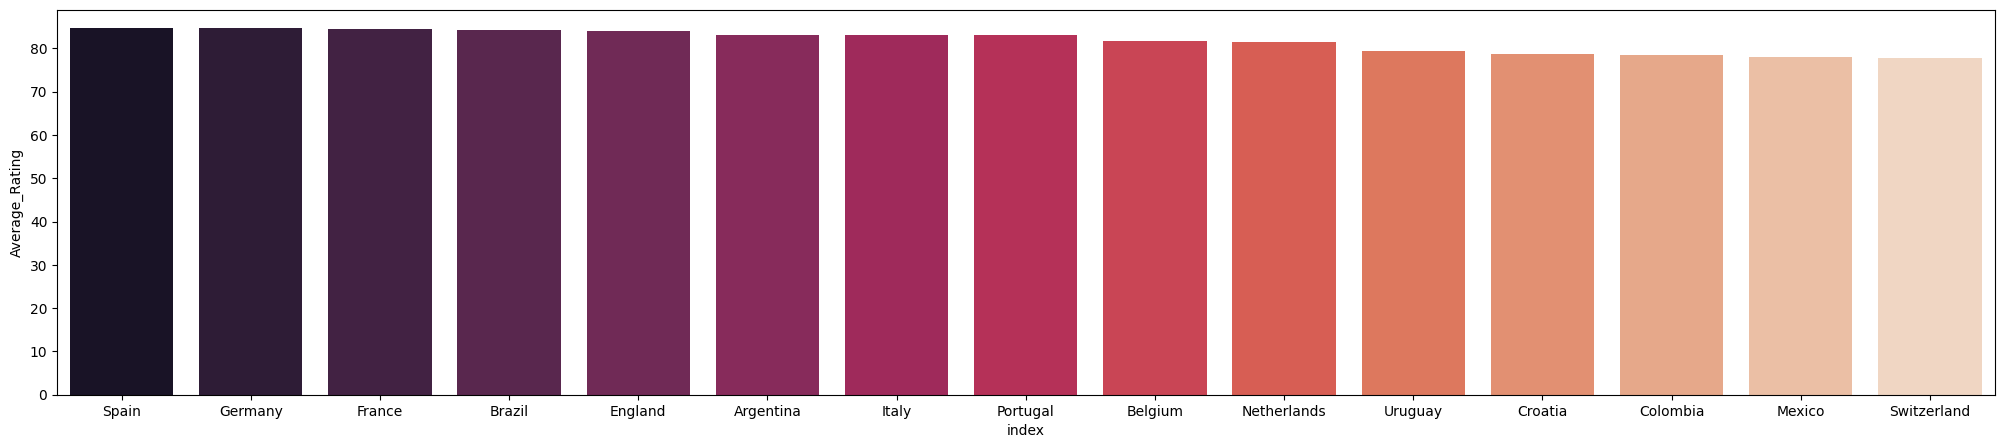

In [375]:
import seaborn as sns
plt.figure(figsize=(25, 5))
sns.barplot(x = "index" , y  = 'Average_Rating', data = average_nat_rating ,palette='rocket')


These countries can have good teams for  national tournaments

11. To come up with a metric that will evaluate the quality of the penalty taker.

12. To come up with a metric that will evaluate the quality of a goalkeeper who saves a penalty.

13. Are there any clubs where the penalty takers are significantly (guess what "substantially" means) better than the goalkeepers who shoot? And vice versa?

14. Top 10 clubs with the best penalty kickers. (1 point)

15. Top 10 clubs with the best goalkeepers.

11. To come up with a metric that will evaluate the quality of the penalty taker.

I'll take the average between  mental_penalties+ power_shot_power/2
I do not use the shooting column, because it consists of unnecessary metrics for penalties

In [376]:
df['doing_penalties'] = np.nan
df.loc[(df['type_of_player'] !='goalkeeper'),'doing_penalties'] =  ( df['power_shot_power']+ df['mentality_penalties'])/2


12. To come up with a metric that will evaluate the quality of a goalkeeper who saves a penalty.
From these data for metrics, take only goalkeeping_diving, goalkeeping_reflexes, and find the average
I want to explain why I didn't take goalkeeping_handling, because for a penalty you only need to hit it, you don't need to catch it, so I didn't take it

In [377]:
df['player_positions']

0        [RW, ST, CF]
1                [ST]
2            [ST, LW]
3           [LW, CAM]
4           [CM, CAM]
             ...     
19234           [CDM]
19235            [CM]
19236            [CM]
19237            [ST]
19238           [CAM]
Name: player_positions, Length: 19239, dtype: object

In [378]:
df['penalties_handling'] = np.nan

df.loc[(df['type_of_player']=='goalkeeper'),'penalties_handling'] = (df['goalkeeping_diving']
+df['goalkeeping_reflexes'] )/2



13. Are there any clubs where the penalty takers are significantly (guess what "substantially" means) better than the goalkeepers who shoot? And vice versa?

For me, "significant" is when penalties and penalties handling metrics differ by more than 15
This question can only be answered by naming the teams, not by naming specific players. So I will find the top goalkeeper in the team and compare with the 10th penalty taker
because only some people take penalties, and the goalkeeper is always the same,so I think it will not be representative to compare the goalkeeper with worst penalty taker


It is obvious that there are players who do not take penalties, which means that, most likely, this indicator will be much lower for them, or are there any new players who are not allowed to take penalties, so they are "significantly" worse than the first goalkeeper

But in the team, only one goalkeeper usually takes a penalty, and the indicator of how good the penalty saver is in the team should be applied only to him. So, obviously, there will not be a "significantly" worse first goalkeeper than penalty takers

In [379]:
clubs_with_better_gk_then_penalties = []

club_names = df.club_name.unique()
for club_name in club_names:
    club = df[df['club_name'] == club_name]
    if len(club) >= 10:
        gk = club[club['type_of_player'] == 'goalkeeper']
        gk = gk.sort_values(by=['penalties_handling'], ascending=False)
        gk1 = gk.iloc[0]
        player = club[club['type_of_player'] != 'goalkeeper']
        player = player.sort_values(by=['doing_penalties'], ascending=False)
        player1 = player.iloc[6]
        if gk1['penalties_handling'] > player1['doing_penalties'] +15:
            clubs_with_better_gk_then_penalties.append(club_name)
        


In [380]:
clubs_with_better_gk_then_penalties

['FC Barcelona',
 'Tottenham Hotspur',
 'Leicester City',
 'Real Sociedad',
 'RB Leipzig',
 'Aston Villa',
 'Eintracht Frankfurt',
 'PFC CSKA Moscow',
 'SV Werder Bremen',
 'Fortaleza',
 'Club Universidad Nacional',
 'DSC Arminia Bielefeld',
 'FC Lokomotiv Moscow',
 'Stade Brestois 29',
 'Al Ittihad',
 'Philadelphia Union',
 'AIK',
 'Al Raed',
 'Lecce',
 'Centro Atlético Fénix',
 'Ulsan Hyundai FC',
 'FC Lorient',
 'Al Batin',
 'Aarhus GF',
 'Rosenborg BK',
 'FC Erzgebirge Aue',
 'FC Lugano',
 'América de Cali',
 'Al Hazem',
 'APOEL Nicosia FC',
 'Club Deportes Tolima',
 'CD Antofagasta',
 'La Equidad',
 '12 de Octubre FC',
 'Sociedad Deportiva Aucas',
 'IK Sirius',
 'Östersunds FK',
 'Central Coast Mariners',
 'Club Social y Deportivo Macará']

In this teams, penalty takers are significantly better than the goalkeepers who shoot

14. Top 10 clubs with the best penalty kickers.

I will take top 7 penalty takers from each team and take the average of them

In [381]:
average_club_penalty_rating = {}
club_names = df.club_name.unique()
for club_name in club_names:
    club = df[df['club_name'] == club_name]
    if len(club) >= 10:
        club.sort_values(by=['doing_penalties'], ascending=False)
        average_club_penalty_rating[club_name] = club['doing_penalties'].head(7).mean()
top10_teams_by_penalty_rating = pd.DataFrame.from_dict(average_club_penalty_rating,orient='index',columns=['Average_Rating'])
top10_teams_by_penalty_rating = top10_teams_by_penalty_rating.sort_values(by=['Average_Rating'], ascending=False)
top10_teams_by_penalty_rating = top10_teams_by_penalty_rating.rename(columns={'index':'club_name'})
top10_teams_by_penalty_rating = top10_teams_by_penalty_rating.reset_index()
top10_teams_by_penalty_rating = top10_teams_by_penalty_rating.head(10)
top10_teams_by_penalty_rating



index  Average_Rating
0      Paris Saint-Germain       82.600000
1        Manchester United       79.357143
2           Real Madrid CF       77.333333
3  Levante Unión Deportiva       77.083333
4                  Chelsea       75.357143
5        FC Bayern München       75.000000
6           U.C. Sampdoria       74.833333
7        Borussia Dortmund       74.714286
8           Leicester City       74.583333
9      Real Betis Balompié       74.583333

15. Top 10 clubs with the best goalkeepers.

Just take the first goalkeeper from each team

In [382]:
club_names = df.club_name.unique()
teams_goalkeepers_rating = {}


for club_name in club_names:
    club = df[df['club_name'] == club_name]
    if len(club) >= 2:
        gk = club[club['type_of_player'] == 'goalkeeper']
        gk = gk.sort_values(by=['penalties_handling'], ascending=False)
        gk1 = gk.iloc[0]
        gk1 = gk1['overall']
        teams_goalkeepers_rating[club_name] = gk1
top10_teams_by_goalkeeper_rating = pd.DataFrame.from_dict(teams_goalkeepers_rating,orient='index',columns=['Average_Rating'])
top10_teams_by_goalkeeper_rating = top10_teams_by_goalkeeper_rating.sort_values(by=['Average_Rating'], ascending=False)
top10_teams_by_goalkeeper_rating = top10_teams_by_goalkeeper_rating.rename(columns={'index':'club_name'})
top10_teams_by_goalkeeper_rating = top10_teams_by_goalkeeper_rating.reset_index()
top10_teams_by_goalkeeper_rating = top10_teams_by_goalkeeper_rating.head(10)
top10_teams_by_goalkeeper_rating


    

index  Average_Rating
0   Atlético de Madrid              91
1         FC Barcelona              90
2    FC Bayern München              90
3  Paris Saint-Germain              89
4      Manchester City              89
5       Real Madrid CF              89
6            Liverpool              89
7    Tottenham Hotspur              87
8             Juventus              87
9                Inter              86

=====================================================================================================================

Яка є цінність цих графіків для бізнесу?
Це може бути корисним для клубам,які хочуть дізнатися як багато чи як мало платять зарплату гравцю,зі схожими характеристиками
Це може бути корисним для людини ,яка збирає картки fifa,яка хоче знати які гравці мають найкращі характеристики
Для футбольних тренерів,яким для їх состава не хватає гравця з певною характеристикою чи при підготовці до матчу,чого статистично очікувати від суперника
Це може бути корисним людині ,яка ставить на футбольні матчі.
це може бути корисним коментаторам,для цікавим фактів про футбол

**EDA**


In [383]:
df.columns

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_position',
       'club_name', 'league_name', 'league_level', 'nationality_name',
       'nation_position', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'player_tags',
       'player_traits', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'me

Характеристики: pace,shooting,passing,dribbling,defending,physic є основними,інші колонки які пов'язані з футбольним скілом є складовими цих характеристик

In [384]:
columns_to_save = ['short_name', 'player_positions', 'overall','value_eur',
                   'age', 'height_cm', 'weight_kg', 'club_position',
       'club_name', 'league_name', 'league_level', 'nationality_name',
       'nation_position', 'preferred_foot', 'weak_foot',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   19239 non-null  object 
 1   player_positions             19239 non-null  object 
 2   overall                      19239 non-null  int64  
 3   potential                    19239 non-null  int64  
 4   value_eur                    19165 non-null  float64
 5   wage_eur                     19178 non-null  float64
 6   age                          19239 non-null  int64  
 7   height_cm                    19239 non-null  int64  
 8   weight_kg                    19239 non-null  int64  
 9   club_position                19178 non-null  object 
 10  club_name                    19178 non-null  object 
 11  league_name                  19178 non-null  object 
 12  league_level                 19178 non-null  float64
 13  nationality_name

In [386]:
df[df['value_eur'].isna()==True].head(50)

short_name player_positions  overall  potential  value_eur  \
147   T. Alderweireld             [CB]       83         83        NaN   
416     G. Krychowiak        [CDM, CM]       80         80        NaN   
694         A. Dzyuba             [ST]       78         78        NaN   
926         M. Ozdoev        [CDM, CM]       77         78        NaN   
1146       Y. Zhirkov         [LB, LM]       76         76        NaN   
1152        A. Shunin             [GK]       76         76        NaN   
1182      A. Dragović         [CB, RB]       76         76        NaN   
1241        M. Borjan             [GK]       76         76        NaN   
1255      V. Claesson    [CAM, LM, CM]       76         76        NaN   
1465  A. D'Alessandro        [CAM, RM]       75         75        NaN   
1471          J. Sand             [ST]       75         75        NaN   
1759       D. Kuzyaev    [CM, RM, CDM]       75         75        NaN   
2170      V. Karavaev             [RB]       74         75        NaN   
2391        Y. Dyupin             [GK]       74         74        NaN   
2429     M. Rodríguez     [LW, LM, ST]       73         73        NaN   
2499         A. Ionov     [RM, LM, ST]       73         73        NaN   
2590         R. Brady         [LM, RM]       73         73        NaN   
2601        J. Brabec             [CB]       73         73        NaN   
2854       M. Degenek        [CB, CDM]       73         76        NaN   
2903  L. Kleinheisler            [CAM]       73         73        NaN   
3169          L. Négo         [RM, RB]       72         72        NaN   
3260       J. Joronen             [GK]       72         72        NaN   
3358       A. Semenov             [CB]       72         72        NaN   
3721       M. Safonov             [GK]       72         82        NaN   
3824         D. Fomin        [CDM, CM]       72         77        NaN   
3890  K. Papadopoulos             [CB]       71         71        NaN   
4390     S. Szymański        [CAM, RM]       71         81        NaN   
4442     Y. Makarenko        [CDM, CM]       71         71        NaN   
4765       N. Nikolić             [ST]       70         70        NaN   
5098          Á. Nagy        [CDM, CM]       70         74        NaN   
5241        A. Matějů         [RB, LB]       70         74        NaN   
5469     Rubén Castro             [ST]       69         69        NaN   
5479         L. Licht    [LB, LWB, LM]       69         69        NaN   
5548    A. Gunnarsson        [CDM, CM]       69         69        NaN   
5586         R. Varga         [LM, RM]       69         69        NaN   
5631         A. Fiola     [RB, CB, LB]       69         69        NaN   
5711   H. Hermannsson             [CB]       69         71        NaN   
5871       D. Rotariu        [CAM, RW]       69         72        NaN   
6194        A. Dovbyk             [ST]       69         75        NaN   
6393      A. Mostovoy         [LM, RM]       69         75        NaN   
6550      P. Arajuuri             [CB]       68         68        NaN   
6857          Á. Lang             [CB]       68         69        NaN   
6985     S. Marinović             [GK]       68         69        NaN   
7218       F. Karačić             [RB]       68         73        NaN   
7475        İ. Öztürk             [CB]       67         67        NaN   
7478      P. Da Silva             [CB]       67         67        NaN   
7488        Zheng Zhi        [CDM, CM]       67         67        NaN   
7496      K. Lafferty             [ST]       67         67        NaN   
7577       R. McGowan             [CB]       67         67        NaN   
7744          M. Duke             [ST]       67         67        NaN   

      wage_eur  age  height_cm  weight_kg club_position  ...  \
147        NaN   32        186         81           NaN  ...   
416        NaN   31        187         84           NaN  ...   
694        NaN   32        196         91           NaN  ...   
926        NaN   28        184 

I will delete people who have not value_in_euros and age >25 because It players how ended their career  or take break from football and they are not representative for our data
But for another will be value = 0 it is new players who have not value yet

In [387]:
df = df.loc[((df['value_eur'].isna()==True) &(df['age']<25))|(df['value_eur'].isna()==False)]
df.loc[df['value_eur'].isna()==True,'value_eur'] = 0

In [388]:
df.loc[df['wage_eur'].isna()==True]

short_name player_positions  overall  potential  value_eur  wage_eur  \
3721     M. Safonov             [GK]       72         82        0.0       NaN   
3824       D. Fomin        [CDM, CM]       72         77        0.0       NaN   
4390   S. Szymański        [CAM, RM]       71         81        0.0       NaN   
6194      A. Dovbyk             [ST]       69         75        0.0       NaN   
6393    A. Mostovoy         [LM, RM]       69         75        0.0       NaN   
10443       M. Woud             [GK]       65         75        0.0       NaN   
10608  D. Cornelius             [CB]       65         71        0.0       NaN   
11750   C. McCowatt     [LW, LM, ST]       64         73        0.0       NaN   
11921      M. Marin         [CM, RM]       64         68        0.0       NaN   
11965       E. Just         [LW, RW]       64         75        0.0       NaN   
11966   N. Pijnaker             [CB]       64         74        0.0       NaN   
12891   O. Valakari        [CM, CAM]       63         68        0.0       NaN   
14199   M. Stamenic   [CM, CDM, CAM]       62         80        0.0       NaN   

       age  height_cm  weight_kg club_position  ... goalkeeping_diving  \
3721    22        192         82           NaN  ...                 74   
3824    24        187         78           NaN  ...                  9   
4390    22        174         60           NaN  ...                  9   
6194    24        184         76           NaN  ...                 13   
6393    23        180         77           NaN  ...                  6   
10443   22        196         85           NaN  ...                 71   
10608   23        187         86           NaN  ...                 13   
11750   22        180         73           NaN  ...                  7   
11921   22        180         75           NaN  ...                 13   
11965   21        174         69           NaN  ...                 13   
11966   22        192         88           NaN  ...                 11   
12891   21        187         82           NaN  ...                  6   
14199   19        188         78           NaN  ...                 13   

      goalkeeping_handling  goalkeeping_kicking goalkeeping_positioning  \
3721                    74                   73                      75   
3824                    10                    7                       7   
4390                    10                   10                      14   
6194                    13                    5                      12   
6393                    14                   13                       9   
10443                   56                   60                      61   
10608                   10                   13                       7   
11750                   10                    5                      10   
11921                    5                   11                      13   
11965                    9                   10                      15   
11966                   12                   13                      12   
12891                    9                   14                       9   
14199                   10                    8                      10   

      goalkeeping_reflexes goalkeeping_speed  first_position  type_of_player  \
3721                    76              20.0              GK      goalkeeper   
3824                    14               NaN             CDM      midfielder   
4390                    14               NaN             CAM      midfielder   
6194                    10               NaN              ST         atacker   
6393                     7               NaN              LM      midfielder   
10443                   68              39.0              GK      goalkeeper   
10608                    6               NaN              CB        defender   
11750                   13               NaN              LW      midfielder   
11921                   15               NaN              CM      

We see young players it is mean that they have not yeat salary

In [389]:
df.loc[df['wage_eur'].isna()==True,'wage_eur'] = 0

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19178 entries, 0 to 19238
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   19178 non-null  object 
 1   player_positions             19178 non-null  object 
 2   overall                      19178 non-null  int64  
 3   potential                    19178 non-null  int64  
 4   value_eur                    19178 non-null  float64
 5   wage_eur                     19178 non-null  float64
 6   age                          19178 non-null  int64  
 7   height_cm                    19178 non-null  int64  
 8   weight_kg                    19178 non-null  int64  
 9   club_position                19165 non-null  object 
 10  club_name                    19165 non-null  object 
 11  league_name                  19165 non-null  object 
 12  league_level                 19165 non-null  float64
 13  nationality_name     

In [391]:
df = df.loc[df['club_position'].isna()==False]

In [392]:
df.drop(['nation_position'], axis=1, inplace=True)
df.drop(['player_tags'], axis=1, inplace=True)

In [393]:
df.loc[df['player_traits'].isna()==True,'player_traits'] = 'No Traits'

I will delete that data because it is only few players and they are not representative for our data

for players who have not pace,shooting,passing,dribbling,defending,physic It means that it goalkeepers

In [394]:
df.loc[df['pace'].isna()==True,'pace'] = 0
df.loc[df['shooting'].isna()==True,'shooting'] = 0
df.loc[df['passing'].isna()==True,'passing'] = 0
df.loc[df['dribbling'].isna()==True,'dribbling'] = 0
df.loc[df['defending'].isna()==True,'defending'] = 0
df.loc[df['physic'].isna()==True,'physic'] = 0
df.loc[df['goalkeeping_speed'].isna()==True,'goalkeeping_speed'] = 0
df.loc[df['doing_penalties'].isna()==True,'doing_penalties'] = 0
df.loc[df['penalties_handling'].isna()==True,'penalties_handling'] = 0


I will leave only pace,shooting,passing,dribbling,defending,physic columns because they are average of other columns,so they are linear dependent

In [395]:
df.columns

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_position',
       'club_name', 'league_name', 'league_level', 'nationality_name',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'player_traits',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_v

In [396]:
columns_to_save =['player_positions', 'overall','value_eur','age',
                  'height_cm', 'weight_kg', 'club_position',
       'club_name', 'league_name', 'league_level', 'nationality_name',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'player_traits',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

In [397]:
df = df[columns_to_save]

In [398]:
discrete_variables = ['player_positions', 'age','club_position','club_name',
                      'league_name','league_level',
                      'nationality_name','preferred_foot','weak_foot',
                      'skill_moves','international_reputation','work_rate','body_type',
                      'player_traits']
            

In [399]:
continious_variables =['overall','value_eur','height_cm','weight_kg','pace',
                       'shooting','passing','dribbling','defending','physic','goalkeeping_diving',
                          'goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning',
                            'goalkeeping_reflexes','goalkeeping_speed']
                       

In [400]:
print(len(discrete_variables))
print(len(continious_variables))
print(len(columns_to_save))

14
16
30


In [401]:
discrete_df = df[discrete_variables]
continious_df = df[continious_variables]

Спочатку будемо аналізувати неперервні змінні

In [402]:
continious_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19165 entries, 0 to 19238
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   overall                  19165 non-null  int64  
 1   value_eur                19165 non-null  float64
 2   height_cm                19165 non-null  int64  
 3   weight_kg                19165 non-null  int64  
 4   pace                     19165 non-null  float64
 5   shooting                 19165 non-null  float64
 6   passing                  19165 non-null  float64
 7   dribbling                19165 non-null  float64
 8   defending                19165 non-null  float64
 9   physic                   19165 non-null  float64
 10  goalkeeping_diving       19165 non-null  int64  
 11  goalkeeping_handling     19165 non-null  int64  
 12  goalkeeping_kicking      19165 non-null  int64  
 13  goalkeeping_positioning  19165 non-null  int64  
 14  goalkeeping_reflexes     19

In [403]:
continious_df.describe()

overall     value_eur     height_cm     weight_kg          pace  \
count  19165.000000  1.916500e+04  19165.000000  19165.000000  19165.000000   
mean      65.760188  2.850452e+06    181.290008     74.930342     60.673154   
std        6.882803  7.613700e+06      6.862654      7.066639     23.761333   
min       47.000000  9.000000e+03    155.000000     49.000000      0.000000   
25%       61.000000  4.750000e+05    176.000000     70.000000     58.000000   
50%       66.000000  9.750000e+05    181.000000     75.000000     67.000000   
75%       70.000000  2.000000e+06    186.000000     80.000000     75.000000   
max       93.000000  1.940000e+08    206.000000    110.000000     97.000000   

           shooting       passing     dribbling     defending        physic  \
count  19165.000000  19165.000000  19165.000000  19165.000000  19165.000000   
mean      46.528150     50.947978     55.623741     45.962327     57.629637   
std       21.104987     20.339412     21.645328     22.277119     22.343583   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       35.000000     47.000000     53.000000     31.000000     54.000000   
50%       52.000000     56.000000     62.000000     53.000000     64.000000   
75%       62.000000     63.000000     68.000000     63.000000     71.000000   
max       94.000000     93.000000     95.000000     91.000000     90.000000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count        19165.000000          19165.000000         19165.000000   
mean            16.401565             16.190347            16.052961   
std             17.566193             16.834231            16.560291   
min              2.000000              2.000000             2.000000   
25%              8.000000              8.000000             8.000000   
50%             11.000000             11.000000            11.000000   
75%             14.000000             14.000000            14.000000   
max             91.000000             92.000000            93.000000   

       goalkeeping_positioning  goalkeeping_reflexes  goalkeeping_speed  
count             19165.000000          19165.000000       19165.000000  
mean                 16.225098             16.489903           4.038456  
std                  17.053315             17.878079          11.985826  
min                   2.000000              2.000000           0.000000  
25%                   8.000000              8.000000           0.000000  
50%                  11.000000             11.000000           0.000000  
75%                  14.000000             14.000000           0.000000  
max                  92.000000             90.000000          65.000000

I will delete goalkeeping_speed because if it zero it means that it is not goalkeeper,it is binary

In [404]:
# import seaborn as sns
# sns.pairplot(continious_df)

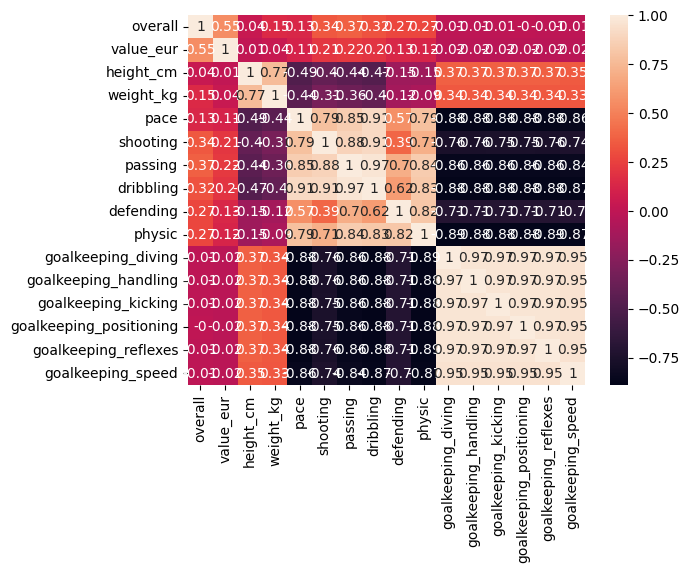

In [405]:
matrix = continious_df.corr().round(2)
sns.heatmap(data=matrix, annot=True)
plt.show()

I will create new columns **pace/diving and shooting/handling passing/kicking dribbling/reflexes defending/pace physical/positioning** because if i dont mix this columns it will be 2 cluster goalkeepers and other players

In [406]:
continious_df.loc[(continious_df['pace']> continious_df['goalkeeping_diving'])==True,'pace/diving'] = continious_df['pace'] 
continious_df.loc[(continious_df['pace']<= continious_df['goalkeeping_diving'])==True,'pace/diving'] = continious_df['goalkeeping_diving']
continious_df.loc[(continious_df['shooting']<= continious_df['goalkeeping_handling'])==True,'shooting/handling'] = continious_df['goalkeeping_handling']
continious_df.loc[(continious_df['shooting']> continious_df['goalkeeping_handling'])==True,'shooting/handling'] = continious_df['shooting']
continious_df.loc[(continious_df['passing']< continious_df['goalkeeping_kicking'])==True,'passing/kicking'] = continious_df['goalkeeping_kicking']
continious_df.loc[(continious_df['passing']>= continious_df['goalkeeping_kicking'])==True,'passing/kicking'] = continious_df['passing']
continious_df.loc[(continious_df['dribbling']< continious_df['goalkeeping_reflexes'])==True,'dribbling/reflexes'] = continious_df['goalkeeping_reflexes']
continious_df.loc[(continious_df['dribbling']>= continious_df['goalkeeping_reflexes'])==True,'dribbling/reflexes'] = continious_df['dribbling']
continious_df.loc[(continious_df['defending']< continious_df['goalkeeping_speed'])==True,'defending/speed'] = continious_df['goalkeeping_speed']
continious_df.loc[(continious_df['defending']>= continious_df['goalkeeping_speed'])==True,'defending/speed'] = continious_df['defending']
continious_df.loc[(continious_df['physic']< continious_df['goalkeeping_positioning'])==True,'physic/positioning'] = continious_df['goalkeeping_positioning']
continious_df.loc[(continious_df['physic']>= continious_df['goalkeeping_positioning'])==True,'physic/positioning'] = continious_df['physic']


C:\Users\vladm\AppData\Local\Temp\ipykernel_2568\3435463184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continious_df.loc[(continious_df['pace']> continious_df['goalkeeping_diving'])==True,'pace/diving'] = continious_df['pace']
C:\Users\vladm\AppData\Local\Temp\ipykernel_2568\3435463184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continious_df.loc[(continious_df['shooting']<= continious_df['goalkeeping_handling'])==True,'shooting/handling'] = continious_df['goalkeeping_handling']
C:\Users\vl

In [407]:
continious_df['pace/diving'].describe()

count    19165.000000
mean        67.875189
std         10.633732
min         28.000000
25%         62.000000
50%         68.000000
75%         75.000000
max         97.000000
Name: pace/diving, dtype: float64

In [408]:
continious_df.columns

Index(['overall', 'value_eur', 'height_cm', 'weight_kg', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'pace/diving', 'shooting/handling', 'passing/kicking',
       'dribbling/reflexes', 'defending/speed', 'physic/positioning'],
      dtype='object')

In [409]:
continious_df = continious_df[['overall', 'value_eur', 'height_cm', 'weight_kg','pace/diving', 'shooting/handling', 'passing/kicking',
       'dribbling/reflexes', 'defending/speed', 'physic/positioning']]


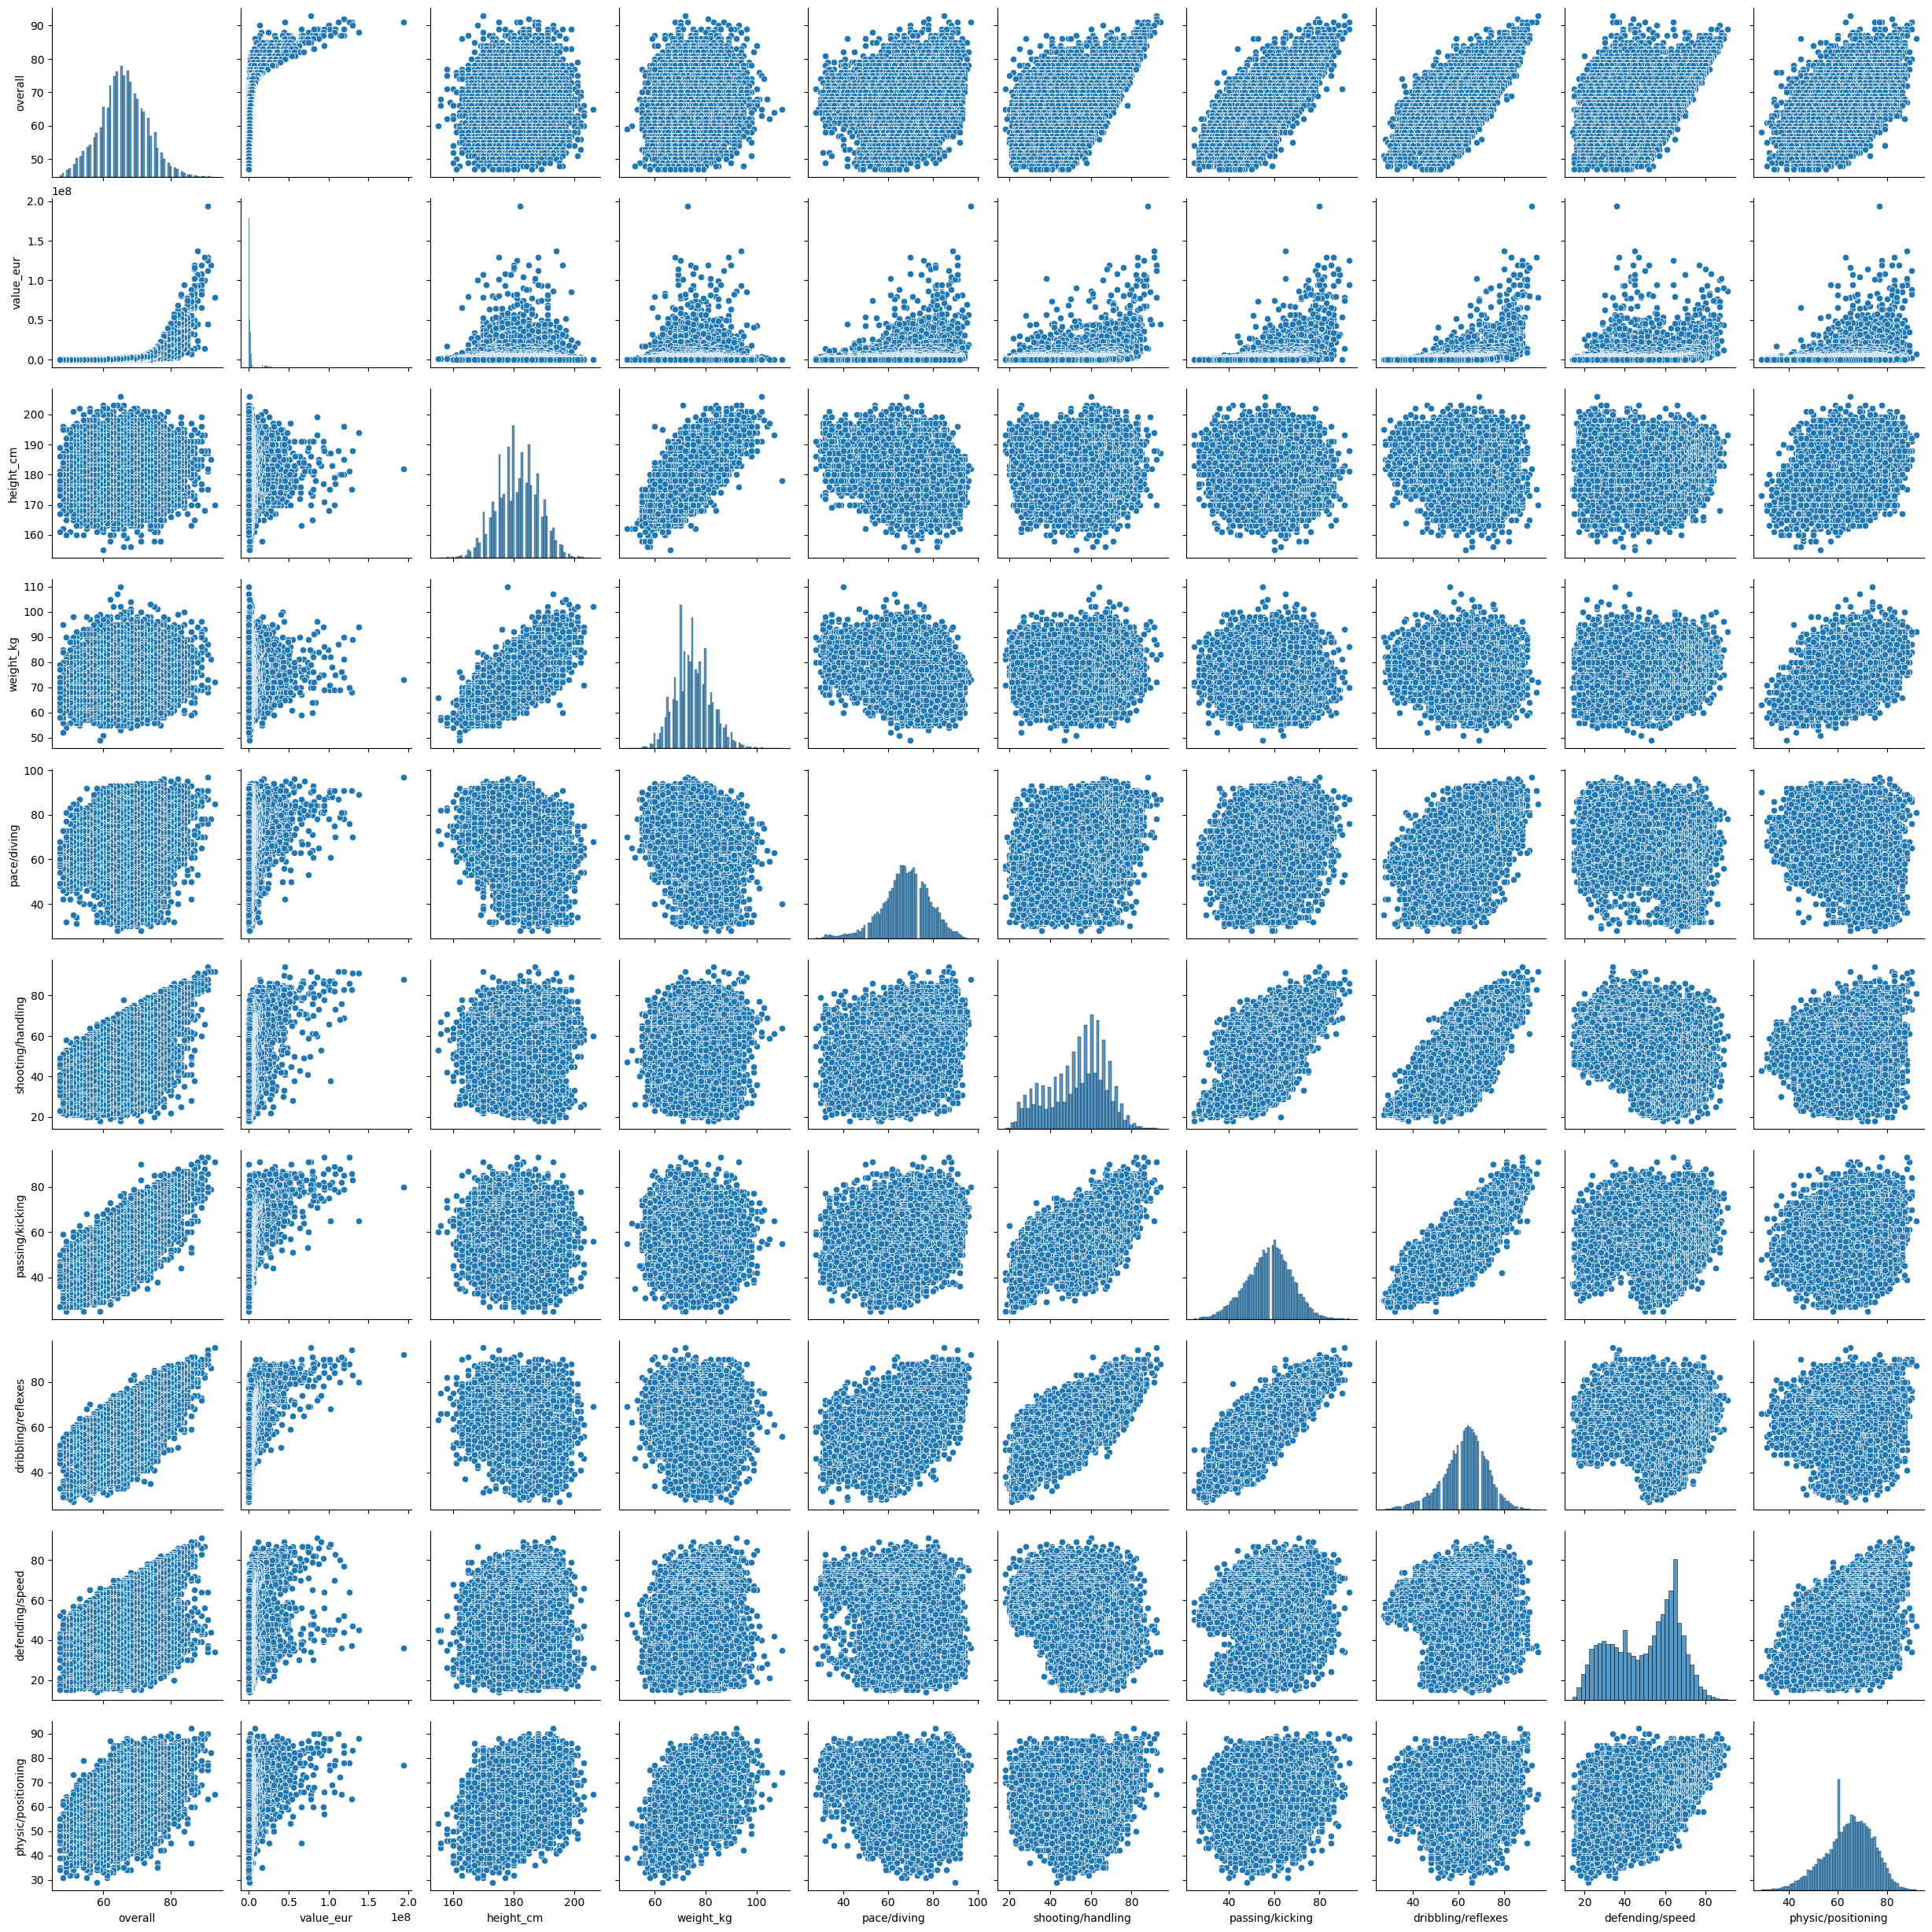

In [410]:
import seaborn as sns
sns.pairplot(continious_df)

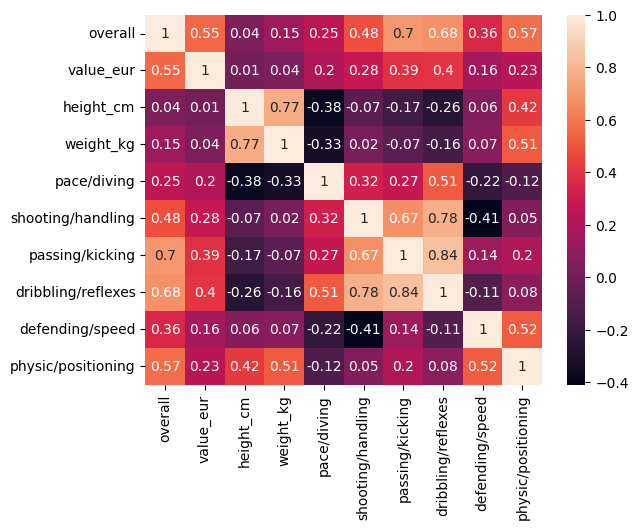

In [411]:
matrix = continious_df.corr().round(2)
sns.heatmap(data=matrix, annot=True)
plt.show()

17. Зробити EDA з точки зору Дата Сайентиста. Які проблеми в датасеті? 

(У польових гравців можуть бути атрибути воротарів і навпаки)

18. Зробити feature engineering, підготувати потрібні змінні для моделювання.

19. Зробит feature selection, обрати ті змінні, які будуть найнеобхіднішими для побудови моделі.

Я зроблю з висотою та вагою BMI і видалю висоту та вагу

In [412]:
continious_df['BMI'] = continious_df['weight_kg']/((continious_df['height_cm']/100))**2

In [413]:
continious_df = continious_df[['overall', 'value_eur', 'BMI','pace/diving', 'shooting/handling', 'passing/kicking','dribbling/reflexes', 'defending/speed', 'physic/positioning']]

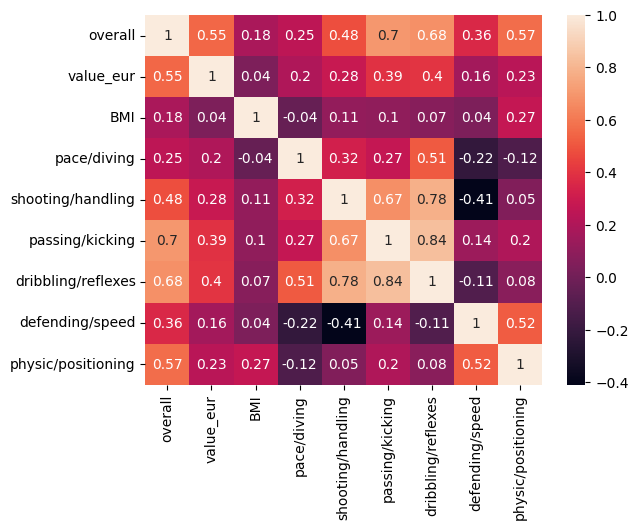

In [414]:
matrix = continious_df.corr().round(2)
sns.heatmap(data=matrix, annot=True)
plt.show()

Для нашої моделі я не буду просити вводити overall,потому що він залежить від інших характеристик,які я використовую в моделі
Та ще цей сайт буде корисним для людей які може тільки починають грати в футбол,вони оцінили себе якось і хочуть дізнатися яку позицію їм краще обрати

Ще у нас дуже велика кореляція між passing/kicking та dribbling/reflexes,тобто якщо гравець гарно дриблить,то він буде гарно пасувати,якщо він гарно реагує на м'яч,то він буде гарно відбивати м'яч своїй команді

Та якщо гравець гарно дріблить то він гарно і б'є і якщо він гарно реагує на м'яч то він гарно відбиває м'яч від воріт

Та виходить якщо людина гарно б'є м'яч то вона гарно пасує

Цікаві спостереження


Можна перевірити яким гравцям треба схуднути чи набрати вагу

Розберемося з діскретними змінними

Я не буду використовувати player_traits,бо її важко перевести в числовий формат

In [415]:
discrete_df = discrete_df[['player_positions', 'age', 'club_position', 'club_name', 'league_name',
       'league_level', 'nationality_name', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate', 'body_type']]

In [416]:
df = pd.concat([discrete_df,continious_df],axis=1)


In [417]:
# df_with_duplicates = pd.DataFrame(columns=df.columns)

#     #Iterate over each row in the dataframe
# for index, row in df.iterrows(): 
#     #Iterate over each position in the player_positions column
#     for player_pos in row['player_positions']:
#         dict_ ={}
#         #Iterate over each column in the dataframe
#         for column in df.columns:
#             if column != 'player_positions':
#                 #for player_positions column assign current position
#                 dict_[column] = row[column]
#             else:
#                 dict_['player_positions'] = player_pos
#         #Append the new dict to the dataframe with max length index
#         df_with_duplicates.loc[len(df_with_duplicates)] = dict_

# df_with_duplicates.to_csv('df_with_duplicates2.csv', index=False)

In [418]:
df = pd.read_csv('df_with_duplicates2.csv')

In [419]:
continious_df = df[['overall', 'value_eur', 'BMI','pace/diving', 'shooting/handling', 'passing/kicking','dribbling/reflexes', 'defending/speed', 'physic/positioning']]

In [420]:
discrete_df = df[['player_positions', 'age', 'club_position', 'club_name', 'league_name',
       'league_level', 'nationality_name', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate', 'body_type']]

In [422]:
discrete_df

player_positions  age club_position            club_name  \
0                   RW   34            RW  Paris Saint-Germain   
1                   ST   34            RW  Paris Saint-Germain   
2                   CF   34            RW  Paris Saint-Germain   
3                   ST   32            ST    FC Bayern München   
4                   ST   36            ST    Manchester United   
...                ...  ...           ...                  ...   
31820              CDM   22           SUB             Wuhan FC   
31821               CM   19           RES           Derry City   
31822               CM   21           RES           Finn Harps   
31823               ST   19           RES           Finn Harps   
31824              CAM   19           SUB  NorthEast United FC   

                          league_name  league_level     nationality_name  \
0                      French Ligue 1           1.0            Argentina   
1                      French Ligue 1           1.0            Argentina   
2                      French Ligue 1           1.0            Argentina   
3                German 1. Bundesliga           1.0               Poland   
4              English Premier League           1.0             Portugal   
...                               ...           ...                  ...   
31820            Chinese Super League           1.0             China PR   
31821  Rep. Ireland Airtricity League           1.0  Republic of Ireland   
31822  Rep. Ireland Airtricity League           1.0  Republic of Ireland   
31823  Rep. Ireland Airtricity League           1.0  Republic of Ireland   
31824             Indian Super League           1.0                India   

      preferred_foot  weak_foot  skill_moves  international_reputation  \
0               Left          4            4                         5   
1               Left          4            4                         5   
2               Left          4            4                         5   
3              Right          4            4                         5   
4              Right          4            5                         5   
...              ...        ...          ...                       ...   
31820          Right          3            2                         1   
31821          Right          3            2                         1   
31822          Right          3            2                         1   
31823          Right          3            2                         1   
31824          Right          3            2                         1   

           work_rate       body_type  
0         Medium/Low          Unique  
1         Medium/Low          Unique  
2         Medium/Low          Unique  
3        High/Medium          Unique  
4           High/Low          Unique  
...              ...             ...  
31820  Medium/Medium  Lean (170-185)  
31821  Medium/Medium  Lean (170-185)  
31822  Medium/Medium  Lean (170-185)  
31823  Medium/Medium  Lean (170-185)  
31824  Medium/Medium     Lean (170-)  

[31825 rows x 13 columns]

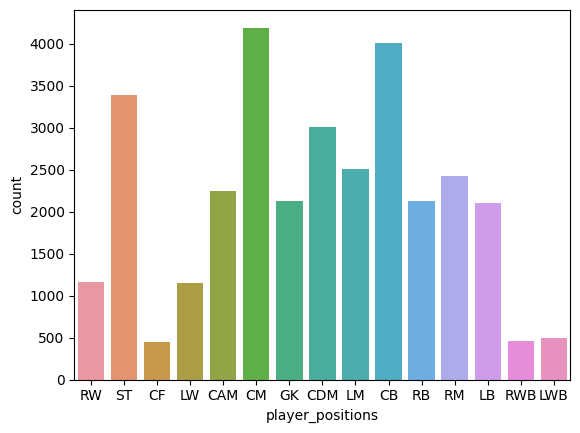

In [425]:
sns.countplot(x = ('player_positions'), data=discrete_df)
plt.show()

Бачимо,що є не популярні позиції гравців,це може означати ,що ці місця на полі важче реалізовувати

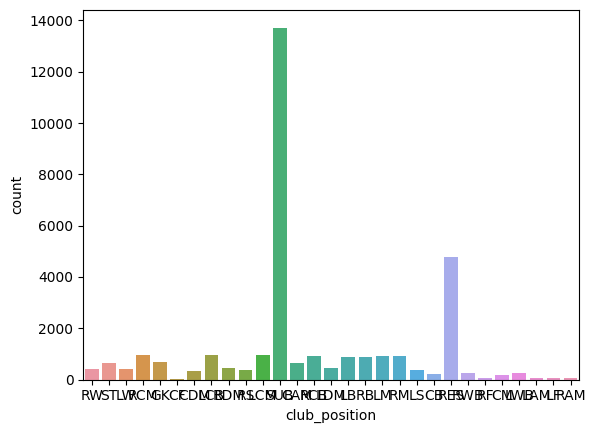

In [430]:
sns.countplot(x = ('club_position'), data=discrete_df)
plt.show()

Бачимо ,що більшість гравців в клубах є запасними.

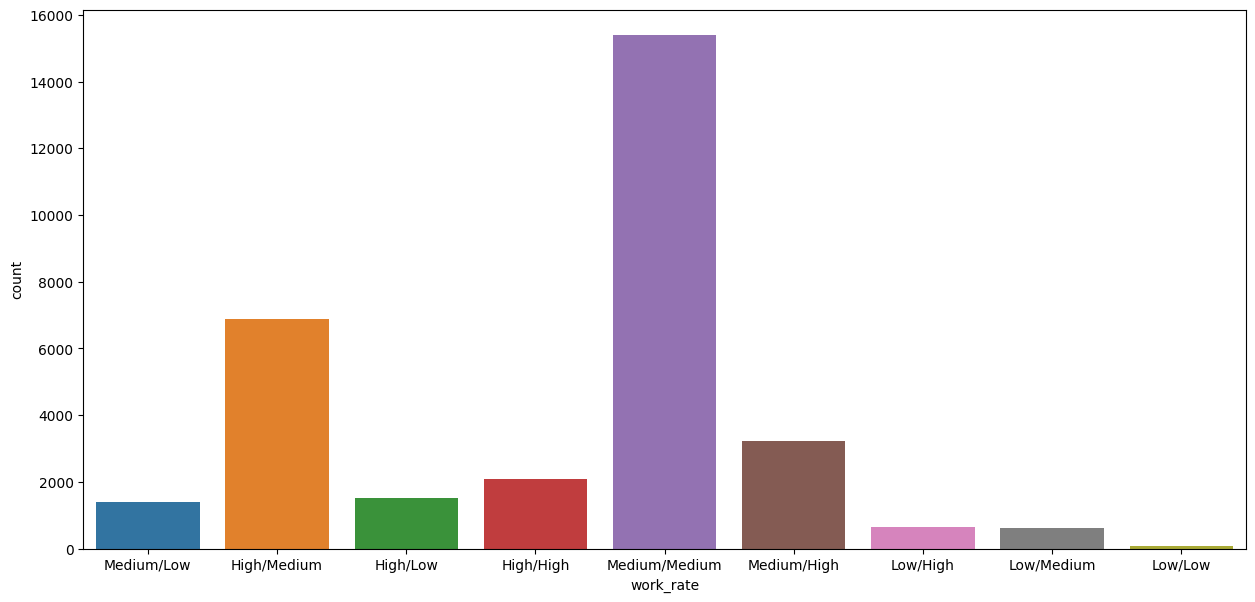

<Figure size 3000x3000 with 0 Axes>

In [444]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(x = ('work_rate'), data=discrete_df,ax=ax)
plt.figure(figsize=(30, 30))
plt.show()

Як і оцікувалось,більшість гравців тренеруються на повну

In [447]:
from sklearn import preprocessing
Label_encoder = preprocessing.LabelEncoder()
discrete_df[['player_positions','club_position','club_name', 'league_name','nationality_name','preferred_foot','work_rate','body_type']] = discrete_df[['player_positions','club_position','club_name', 'league_name','nationality_name','preferred_foot','work_rate','body_type']].apply(Label_encoder.fit_transform)


C:\Users\vladm\AppData\Local\Temp\ipykernel_2568\808539395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df[['player_positions','club_position','club_name', 'league_name','nationality_name','preferred_foot','work_rate','body_type']] = discrete_df[['player_positions','club_position','club_name', 'league_name','nationality_name','preferred_foot','work_rate','body_type']].apply(Label_encoder.fit_transform)


In [449]:
import researchpy as rp

# Calculate Cramér's V
result = rp.crosstab(discrete_df,discrete_df['player_positions'], prop='col')
cramer_v = rp.cramers_v(result)

AttributeError: module 'researchpy' has no attribute 'cramers_v'

In [450]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Приклад використання


# Обчислення кореляційної матриці
corr_matrix = pd.DataFrame(index=discrete_df.columns, columns=discrete_df.columns)

for var1 in discrete_df.columns:
    for var2 in discrete_df.columns:
        corr_matrix.loc[var1, var2] = cramers_v(discrete_df[var1], discrete_df[var2])

print("Кореляційна матриця:")
print(corr_matrix)


Кореляційна матриця:
                         player_positions       age club_position club_name  \
player_positions                      1.0  0.041514      0.335044  0.015957   
age                              0.041514       1.0      0.085953  0.151763   
club_position                    0.335044  0.085953           1.0  0.096768   
club_name                        0.015957  0.151763      0.096768       1.0   
league_name                        0.0618  0.078446      0.055398  0.989781   
league_level                     0.038289  0.039123      0.038359  0.989003   
nationality_name                 0.061955  0.089381      0.077025  0.391837   
preferred_foot                   0.435663  0.037964      0.335657   0.10892   
weak_foot                        0.171943  0.074758        0.1245  0.188258   
skill_moves                      0.556058  0.124046      0.355068  0.205512   
international_reputation         0.034301  0.132211      0.092972  0.340082   
work_rate                      

In [451]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table


# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(discrete_df)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Chi-square statistic: 3353904.936718399
p-value: 0.0
Degrees of freedom: 381888
Expected frequencies:
[[ 7.01490107 28.51353572 23.68701985 ...  1.23933644  6.1321541
   3.74252218]
 [ 7.038441   28.60921872 23.7665065  ...  1.24349528  6.1527318
   3.75508098]
 [ 6.90897135 28.08296219 23.32932995 ...  1.22062162  6.03955446
   3.68600758]
 ...
 [ 6.10861351 24.82973999 20.62678407 ...  1.07922082  5.33991272
   3.2590084 ]
 [ 6.20277326 25.21247202 20.94473064 ...  1.09585621  5.42222351
   3.3092436 ]
 [ 7.15614069 29.08763375 24.16393971 ...  1.26428952  6.25562029
   3.81787497]]
